# Problem to Solve

**Problem**

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment data.

The whole data divided to "train" and "test". Target isn't included in test.

__Column Information__:

* enrollee_id : Unique ID for candidate

* city: City code

* city_ development _index : Development index of the city (scaled)

* gender: Gender of candidate

* relevent_experience: Relevant experience of candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline: Education major discipline of candidate

* experience: Candidate total experience in years

* company_size: Number of employees in current employer's company

* company_type: Type of current employer

* last_new_job: Difference in years between previous job and current job

* training_hours: Training hours completed

* target: 0 – Not looking for job change, 1 – Looking for a job change

**Project Goal**

* Prediction of the probability of a candidate will work for the company.

# Import And See The Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_train = '../datasets/kaggle/HR Analytics/aug_train.csv'
path_test = '../datasets/kaggle/HR Analytics/aug_test.csv'
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [4]:
train

enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
3       No relevent experience                 NaN        Graduate   
4      Has relevent experience       no_enrollment         Masters   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
0                 STEM        >20          NaN             NaN            1   
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5          NaN             NaN        never   
3      Business Degree         <1          NaN         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
...                ...        ...          ...             ...          ...   
19153       Humanities         14          NaN             NaN            1   
19154             STEM         14          NaN             NaN            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156              NaN         <1      500-999         Pvt Ltd            2   
19157              NaN          2          NaN             NaN            1   

       training_hours  target  
0                  36       1  
1                  47       0  
2                  83       0  
3                  52       1  
4                   8       0  
...               ...     ...  
19153              42       1  
19154              52       1  
19155              44       0  
19156              97       0  
19157             127       0  

[19158 rows x 14 columns]

In [5]:
test

enrollee_id      city  city_development_index  gender  \
0           32403   city_41                   0.827    Male   
1            9858  city_103                   0.920  Female   
2           31806   city_21                   0.624    Male   
3           27385   city_13                   0.827    Male   
4           27724  city_103                   0.920    Male   
...           ...       ...                     ...     ...   
2124         1289  city_103                   0.920    Male   
2125          195  city_136                   0.897    Male   
2126        31762  city_100                   0.887    Male   
2127         7873  city_102                   0.804    Male   
2128        12215  city_102                   0.804    Male   

          relevent_experience enrolled_university education_level  \
0     Has relevent experience    Full time course        Graduate   
1     Has relevent experience       no_enrollment        Graduate   
2      No relevent experience       no_enrollment     High School   
3     Has relevent experience       no_enrollment         Masters   
4     Has relevent experience       no_enrollment        Graduate   
...                       ...                 ...             ...   
2124   No relevent experience       no_enrollment        Graduate   
2125  Has relevent experience       no_enrollment         Masters   
2126   No relevent experience       no_enrollment  Primary School   
2127  Has relevent experience    Full time course     High School   
2128  Has relevent experience       no_enrollment         Masters   

     major_discipline experience company_size   company_type last_new_job  \
0                STEM          9          <10            NaN            1   
1                STEM          5          NaN        Pvt Ltd            1   
2                 NaN         <1          NaN        Pvt Ltd        never   
3                STEM         11        10/49        Pvt Ltd            1   
4                STEM        >20       10000+        Pvt Ltd           >4   
...               ...        ...          ...            ...          ...   
2124       Humanities         16          NaN  Public Sector            4   
2125             STEM         18          NaN            NaN            2   
2126              NaN          3          NaN        Pvt Ltd        never   
2127              NaN          7      100-500  Public Sector            1   
2128             STEM         15       10000+        Pvt Ltd            2   

      training_hours  
0                 21  
1                 98  
2                 15  
3                 39  
4                 72  
...              ...  
2124              15  
2125              30  
2126              18  
2127              84  
2128              11  

[2129 rows x 13 columns]

__We will append the test dataset under the train dataset to do data processing on both sets. We'll use an `last_train_index` variable as a boundary between two parts__

In [6]:
last_train_index = 19157
df = pd.concat((train, test), axis=0)
df

enrollee_id      city  city_development_index gender  \
0            8949  city_103                   0.920   Male   
1           29725   city_40                   0.776   Male   
2           11561   city_21                   0.624    NaN   
3           33241  city_115                   0.789    NaN   
4             666  city_162                   0.767   Male   
...           ...       ...                     ...    ...   
2124         1289  city_103                   0.920   Male   
2125          195  city_136                   0.897   Male   
2126        31762  city_100                   0.887   Male   
2127         7873  city_102                   0.804   Male   
2128        12215  city_102                   0.804   Male   

          relevent_experience enrolled_university education_level  \
0     Has relevent experience       no_enrollment        Graduate   
1      No relevent experience       no_enrollment        Graduate   
2      No relevent experience    Full time course        Graduate   
3      No relevent experience                 NaN        Graduate   
4     Has relevent experience       no_enrollment         Masters   
...                       ...                 ...             ...   
2124   No relevent experience       no_enrollment        Graduate   
2125  Has relevent experience       no_enrollment         Masters   
2126   No relevent experience       no_enrollment  Primary School   
2127  Has relevent experience    Full time course     High School   
2128  Has relevent experience       no_enrollment         Masters   

     major_discipline experience company_size    company_type last_new_job  \
0                STEM        >20          NaN             NaN            1   
1                STEM         15        50-99         Pvt Ltd           >4   
2                STEM          5          NaN             NaN        never   
3     Business Degree         <1          NaN         Pvt Ltd        never   
4                STEM        >20        50-99  Funded Startup            4   
...               ...        ...          ...             ...          ...   
2124       Humanities         16          NaN   Public Sector            4   
2125             STEM         18          NaN             NaN            2   
2126              NaN          3          NaN         Pvt Ltd        never   
2127              NaN          7      100-500   Public Sector            1   
2128             STEM         15       10000+         Pvt Ltd            2   

      training_hours  target  
0                 36     1.0  
1                 47     0.0  
2                 83     0.0  
3                 52     1.0  
4                  8     0.0  
...              ...     ...  
2124              15     NaN  
2125              30     NaN  
2126              18     NaN  
2127              84     NaN  
2128              11     NaN  

[21287 rows x 14 columns]

In [7]:
# set enrolle ID as index
df.set_index('enrollee_id', inplace=True)
df

city  city_development_index gender      relevent_experience  \
enrollee_id                                                                     
8949         city_103                   0.920   Male  Has relevent experience   
29725         city_40                   0.776   Male   No relevent experience   
11561         city_21                   0.624    NaN   No relevent experience   
33241        city_115                   0.789    NaN   No relevent experience   
666          city_162                   0.767   Male  Has relevent experience   
...               ...                     ...    ...                      ...   
1289         city_103                   0.920   Male   No relevent experience   
195          city_136                   0.897   Male  Has relevent experience   
31762        city_100                   0.887   Male   No relevent experience   
7873         city_102                   0.804   Male  Has relevent experience   
12215        city_102                   0.804   Male  Has relevent experience   

            enrolled_university education_level major_discipline experience  \
enrollee_id                                                                   
8949              no_enrollment        Graduate             STEM        >20   
29725             no_enrollment        Graduate             STEM         15   
11561          Full time course        Graduate             STEM          5   
33241                       NaN        Graduate  Business Degree         <1   
666               no_enrollment         Masters             STEM        >20   
...                         ...             ...              ...        ...   
1289              no_enrollment        Graduate       Humanities         16   
195               no_enrollment         Masters             STEM         18   
31762             no_enrollment  Primary School              NaN          3   
7873           Full time course     High School              NaN          7   
12215             no_enrollment         Masters             STEM         15   

            company_size    company_type last_new_job  training_hours  target  
enrollee_id                                                                    
8949                 NaN             NaN            1              36     1.0  
29725              50-99         Pvt Ltd           >4              47     0.0  
11561                NaN             NaN        never              83     0.0  
33241                NaN         Pvt Ltd        never              52     1.0  
666                50-99  Funded Startup            4               8     0.0  
...                  ...             ...          ...             ...     ...  
1289                 NaN   Public Sector            4              15     NaN  
195                  NaN             NaN            2              30     NaN  
31762                NaN         Pvt Ltd        never              18     NaN  
7873             100-500   Public Sector            1              84     NaN  
12215             10000+         Pvt Ltd            2              11     NaN  

[21287 rows x 13 columns]

Now, we have a picture of what kind of data we're dealing with. Our dataframe has 13 columns, with 12 of them used as features, and the last column stores the target value which we have to predict.

Let's see some general info about our data. Remember that __we should only look at the training , not test data.__

In [8]:
train.set_index('enrollee_id', inplace=True)
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 2.0+ MB


Most of the columns are of type `Object` (`String` actually). Only `city_devevlopment_index` and `training_hours` are numerical features. 

Looking at the data, it seems like most `Object` columns are categorical. We want to verify that.

In [9]:
train.nunique()

city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64

In [10]:
cols_to_verify = ['city', 'gender', 'major_discipline']
for col in cols_to_verify:
    print(col.upper() + ' Columns')
    print(train[col].value_counts())
    print()

CITY Columns
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

GENDER Columns
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

MAJOR_DISCIPLINE Columns
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64



Our assumption was right, at least for those columns above. You can check other columns as well, but we'll do this later when we explore each feature

In [11]:
# see the distribution of numerical attributes
train.describe()

city_development_index  training_hours        target
count            19158.000000    19158.000000  19158.000000
mean                 0.828848       65.366896      0.249348
std                  0.123362       60.058462      0.432647
min                  0.448000        1.000000      0.000000
25%                  0.740000       23.000000      0.000000
50%                  0.903000       47.000000      0.000000
75%                  0.920000       88.000000      0.000000
max                  0.949000      336.000000      1.000000

Most candidates appear to come from cities with high `city_development_index` (I'll call this feature `CDI` for short). And the `target` mean is only about `0.25`, which indicates the majority of candidates actually does not want to change their jobs.

In [12]:
# See if there is any null in our data
null_info = pd.DataFrame({'Null count': train.isnull().sum(), 'Null ratio': train.isnull().sum()/len(train)})
null_info.drop('target', inplace=True)
null_info.sort_values(by='Null ratio', ascending=False, inplace=True)
null_info

Null count  Null ratio
company_type                  6140    0.320493
company_size                  5938    0.309949
gender                        4508    0.235306
major_discipline              2813    0.146832
education_level                460    0.024011
last_new_job                   423    0.022080
enrolled_university            386    0.020148
experience                      65    0.003393
city                             0    0.000000
city_development_index           0    0.000000
relevent_experience              0    0.000000
training_hours                   0    0.000000

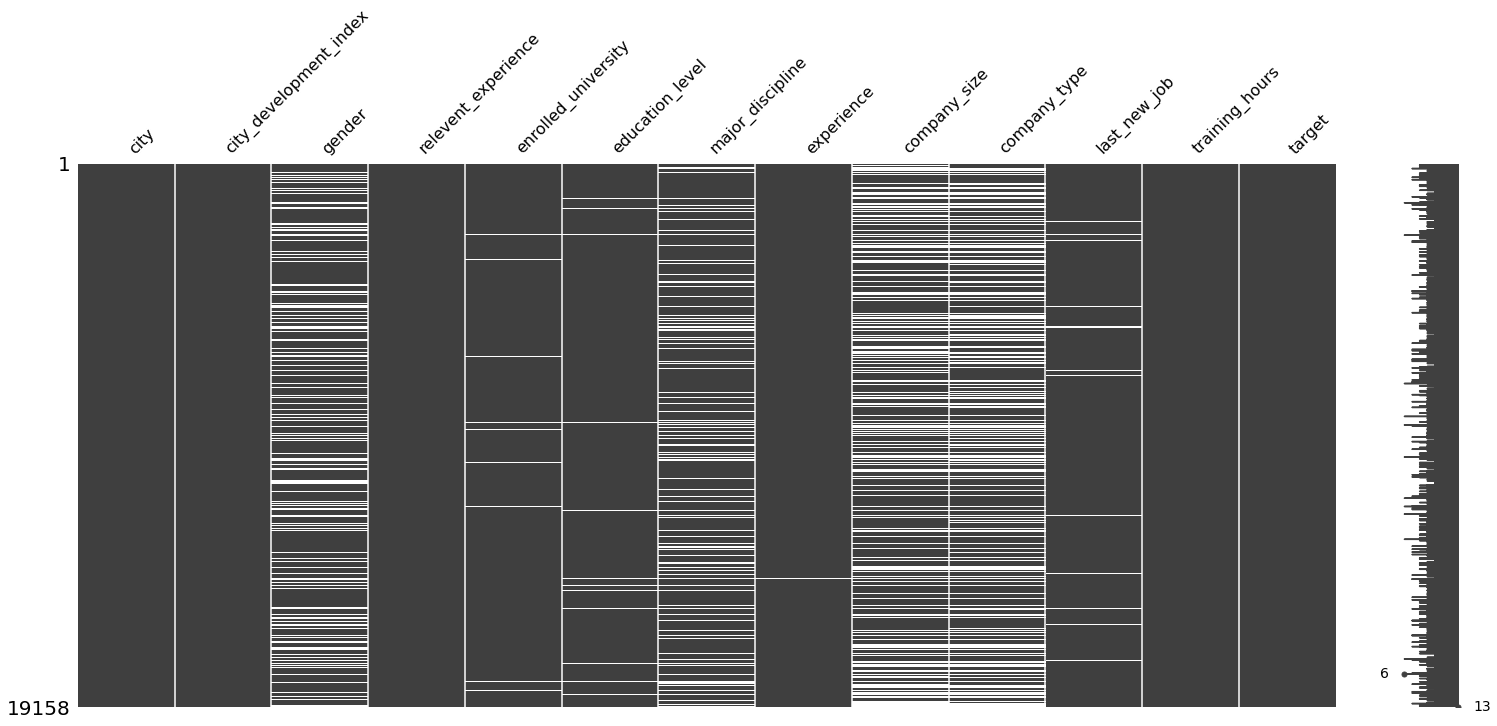

In [13]:
# visualize missing data
import missingno as msno

msno.matrix(train);

There's a lot of missing values in our data. 

In [88]:
# see the proportion between positive and negative example
print('% negative:', format((train.target==0).sum() / len(train) * 100,'.2f'))
print('% positive:', format((train.target==1).sum() / len(train) * 100,'.2f'))

% negative: 75.07
% positive: 24.93


So this is an imbalance dataset, with the majority of examples are negative. We'll need to handle this, otherwise our prediction will be very poor.

# Visualize And Process Data

In [15]:
train

city  city_development_index gender      relevent_experience  \
enrollee_id                                                                     
8949         city_103                   0.920   Male  Has relevent experience   
29725         city_40                   0.776   Male   No relevent experience   
11561         city_21                   0.624    NaN   No relevent experience   
33241        city_115                   0.789    NaN   No relevent experience   
666          city_162                   0.767   Male  Has relevent experience   
...               ...                     ...    ...                      ...   
7386         city_173                   0.878   Male   No relevent experience   
31398        city_103                   0.920   Male  Has relevent experience   
24576        city_103                   0.920   Male  Has relevent experience   
5756          city_65                   0.802   Male  Has relevent experience   
23834         city_67                   0.855    NaN   No relevent experience   

            enrolled_university education_level major_discipline experience  \
enrollee_id                                                                   
8949              no_enrollment        Graduate             STEM        >20   
29725             no_enrollment        Graduate             STEM         15   
11561          Full time course        Graduate             STEM          5   
33241                       NaN        Graduate  Business Degree         <1   
666               no_enrollment         Masters             STEM        >20   
...                         ...             ...              ...        ...   
7386              no_enrollment        Graduate       Humanities         14   
31398             no_enrollment        Graduate             STEM         14   
24576             no_enrollment        Graduate             STEM        >20   
5756              no_enrollment     High School              NaN         <1   
23834             no_enrollment  Primary School              NaN          2   

            company_size    company_type last_new_job  training_hours  target  
enrollee_id                                                                    
8949                 NaN             NaN            1              36       1  
29725              50-99         Pvt Ltd           >4              47       0  
11561                NaN             NaN        never              83       0  
33241                NaN         Pvt Ltd        never              52       1  
666                50-99  Funded Startup            4               8       0  
...                  ...             ...          ...             ...     ...  
7386                 NaN             NaN            1              42       1  
31398                NaN             NaN            4              52       1  
24576              50-99         Pvt Ltd            4              44       0  
5756             500-999         Pvt Ltd            2              97       0  
23834                NaN             NaN            1             127       0  

[19158 rows x 13 columns]

Because most of our features are string, we need to turn them into numerics. In this part, I'll go through each column, visualize and process them at the same time. It's quite hard to build a pipeline for processing this dataset from end to end. So I'll opt for the simple way.

Since we should not touch the test set until our model is ready to run, I'll explore and visualize only the training set. But data preprocessing (clean, encode, ...) is done on both.

In [16]:
# set params for matplotlib
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9,6)
# create a copy of the original training set
train1 = train.copy()
df1 = df.copy()

## City Development Index

In [17]:
train1.city_development_index

enrollee_id
8949     0.920
29725    0.776
11561    0.624
33241    0.789
666      0.767
         ...  
7386     0.878
31398    0.920
24576    0.920
5756     0.802
23834    0.855
Name: city_development_index, Length: 19158, dtype: float64

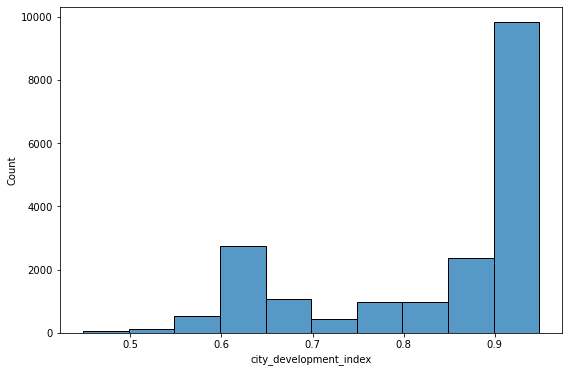

In [18]:
# city development index histogram
sns.histplot(train1.city_development_index, bins=10);

So most of the candidates come from cities that have high development index. We might want to see the `CDI` for each type of candidates (negative and positive candidates)

Text(0, 0.5, 'Target Count')

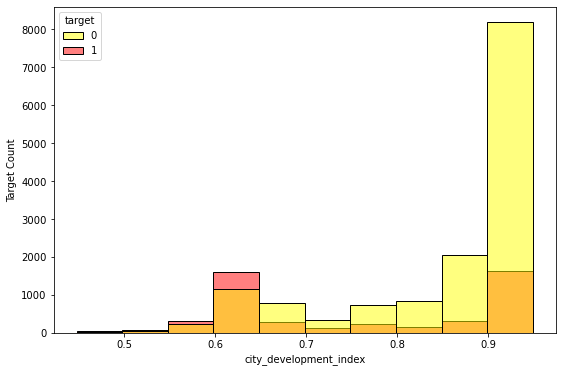

In [19]:
sns.histplot(data=train1, x='city_development_index', hue='target',multiple='layer',
             palette=['yellow', 'red'], bins=10);
plt.ylabel('Target Count')

So cities with lower `CDI` have higher positive candidates ratio.

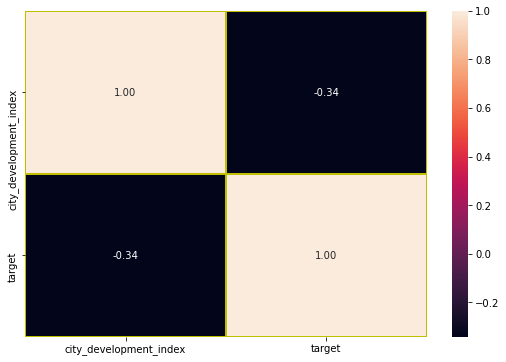

In [20]:
# correlation between city development index with target value
sns.heatmap(train1[['city_development_index', 'target']].corr(), annot=True, fmt='.2f',
            linecolor='y', linewidths=2);

In [21]:
# measure correlation by Kruskal-Wallis H Test
print('Standard Deviation of CDI of All Candidates:', train.city_development_index.std())
print('Standard Deviation of CDI of Positive Candidates:', 
      train.city_development_index[train.target==1].std())
print('Standard Deviation of CDI of Negative Candidates:', 
      train.city_development_index[train.target==0].std())

Standard Deviation of CDI of All Candidates: 0.12336175686054494
Standard Deviation of CDI of Positive Candidates: 0.1431656966275837
Standard Deviation of CDI of Negative Candidates: 0.1053540673993056


Because the variance of `CDI` for all candidates and for each type of candidates are pretty similar, `CDI` does not seem to have any strong correlation with our target value.

## Gender

In [22]:
train1.gender.value_counts(dropna=False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [23]:
# pie chart with plotly
import plotly.express as px

def plot_pie_chart_plotly(series):
    col_val_count = series.value_counts(dropna=False)
    fig = px.pie(col_val_count, values = col_val_count, 
                 names=col_val_count.index, title=col_val_count.name.upper())
    fig.show()

plot_pie_chart_plotly(df1.gender)

Male is dominant here.

Text(0.5, 1.0, 'Target Mean By Gender')

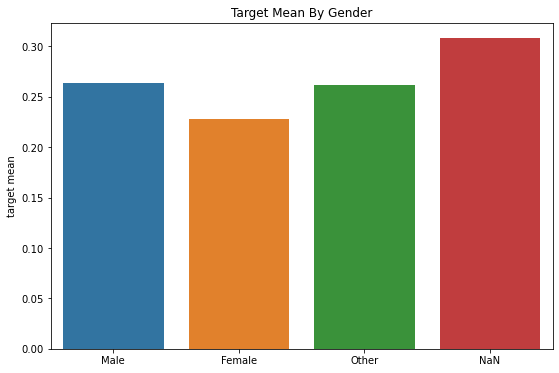

In [24]:
# see the relationship between gender and target value
mean_target_per_gender = train1.groupby('gender', dropna=False)['target'].mean()
mean_target_per_gender.index = ['Male', 'Female', 'Other', 'NaN']
sns.barplot(x=mean_target_per_gender.index, y=mean_target_per_gender)
plt.ylabel('target mean')
plt.title('Target Mean By Gender')

There's a lot of male candidates, but only one-fourth of them are positive. Others genders seem to be more prospective than male. 

In [25]:
# encode this feature
def gender_encode(x):
    if x=='Male':
        return 0
    if x=='Female':
        return 1
    if x=='Other':
        return 2
    if x is None:
        return None

# encode the feature on both train and test set
df1['gender_encoded'] = df1['gender'].apply(lambda x: gender_encode(x))
df1

city  city_development_index gender      relevent_experience  \
enrollee_id                                                                     
8949         city_103                   0.920   Male  Has relevent experience   
29725         city_40                   0.776   Male   No relevent experience   
11561         city_21                   0.624    NaN   No relevent experience   
33241        city_115                   0.789    NaN   No relevent experience   
666          city_162                   0.767   Male  Has relevent experience   
...               ...                     ...    ...                      ...   
1289         city_103                   0.920   Male   No relevent experience   
195          city_136                   0.897   Male  Has relevent experience   
31762        city_100                   0.887   Male   No relevent experience   
7873         city_102                   0.804   Male  Has relevent experience   
12215        city_102                   0.804   Male  Has relevent experience   

            enrolled_university education_level major_discipline experience  \
enrollee_id                                                                   
8949              no_enrollment        Graduate             STEM        >20   
29725             no_enrollment        Graduate             STEM         15   
11561          Full time course        Graduate             STEM          5   
33241                       NaN        Graduate  Business Degree         <1   
666               no_enrollment         Masters             STEM        >20   
...                         ...             ...              ...        ...   
1289              no_enrollment        Graduate       Humanities         16   
195               no_enrollment         Masters             STEM         18   
31762             no_enrollment  Primary School              NaN          3   
7873           Full time course     High School              NaN          7   
12215             no_enrollment         Masters             STEM         15   

            company_size    company_type last_new_job  training_hours  target  \
enrollee_id                                                                     
8949                 NaN             NaN            1              36     1.0   
29725              50-99         Pvt Ltd           >4              47     0.0   
11561                NaN             NaN        never              83     0.0   
33241                NaN         Pvt Ltd        never              52     1.0   
666                50-99  Funded Startup            4               8     0.0   
...                  ...             ...          ...             ...     ...   
1289                 NaN   Public Sector            4              15     NaN   
195                  NaN             NaN            2              30     NaN   
31762                NaN         Pvt Ltd        never              18     NaN   
7873             100-500   Public Sector            1              84     NaN   
12215             10000+         Pvt Ltd            2              11     NaN   

             gender_encoded  
enrollee_id                  
8949                    0.0  
29725                   0.0  
11561                   NaN  
33241                   NaN  
666                     0.0  
...                     ...  
1289                    0.0  
195                     0.0  
31762                   0.0  
7873                    0.0  
12215                   0.0  

[21287 rows x 14 columns]

In [26]:
df1.gender_encoded.value_counts()

0.0    14681
1.0     1375
2.0      215
Name: gender_encoded, dtype: int64

In [27]:
df.gender.value_counts()

Male      14681
Female     1375
Other       215
Name: gender, dtype: int64

So we've successfully encoded the `gender` column

## City

First, we'll plot a pie chart to see the proportion of each city. Because there're over 100 different cities, it's not a good idea to plot all of them in a pie.

In [28]:
# proportion of each city
(train1.city.value_counts(dropna=False) / len(train1.city) * 100)

city_103    22.732018
city_21     14.103769
city_16      8.001879
city_114     6.973588
city_160     4.410690
              ...    
city_129     0.015659
city_111     0.015659
city_121     0.015659
city_140     0.005220
city_171     0.005220
Name: city, Length: 123, dtype: float64

In [29]:
# We only take 6 cities with the most candidates to plot on the pie
city_cat = train1.city.value_counts()
city_cat_reduced = city_cat.head(6)
city_cat_reduced['other'] = len(train1.city) - city_cat_reduced.sum() # number of other cities

In [30]:
city_cat_reduced

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
other       7801
Name: city, dtype: int64

In [31]:
px.pie(city_cat_reduced, names=city_cat_reduced.index, values=city_cat_reduced, title='CITY')

Now we want to see the relationship between `city` and target value. It might be helpful to know which cities has the highest ratio of positive candidates

In [32]:
# we only consider city with >= 100 candidates
city_to_consider = pd.DataFrame(city_cat[city_cat>=100])
city_to_consider.columns = ['total']
# calculate the ratio of positive candidates for each city
city_groupby = train1.groupby('city')
for city in city_to_consider.index:
    group = city_groupby.get_group(city)
    pos_count = len(group[group.target==1])
    ratio = '{0:.2f}'.format(pos_count / len(group))
    city_to_consider.loc[city, "positive"] = pos_count
    city_to_consider.loc[city, "positive_ratio"] = float(ratio)
    
city_to_consider.head(10)

total  positive  positive_ratio
city_103   4355     928.0            0.21
city_21    2702    1597.0            0.59
city_16    1533     179.0            0.12
city_114   1336     133.0            0.10
city_160    845     199.0            0.24
city_136    586      61.0            0.10
city_67     431      57.0            0.13
city_75     305      31.0            0.10
city_102    304      52.0            0.17
city_104    301      28.0            0.09

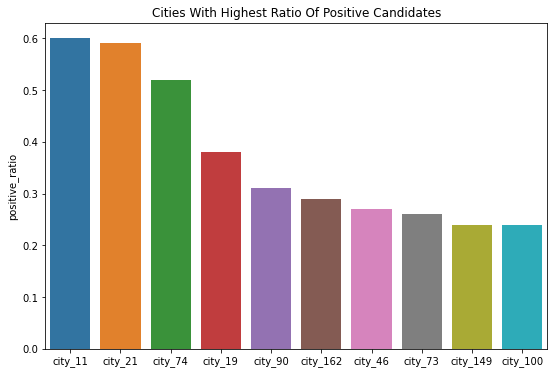

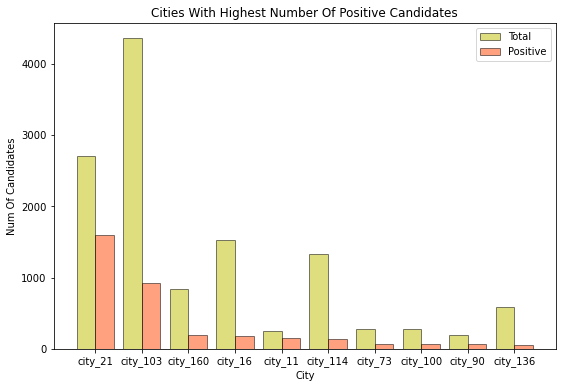

In [33]:
top_10_ratio = city_to_consider.sort_values(axis=0, by='positive_ratio',
                                           ascending=False).head(10)
top_10_quantity = city_to_consider.sort_values(axis=0, by='positive',
                                           ascending=False).head(10)
# plot top 10 ratio
plt.figure()
sns.barplot(data=top_10_ratio, x=top_10_ratio.index, y='positive_ratio')
plt.title('Cities With Highest Ratio Of Positive Candidates')
# plot top 10 quantity
plt.figure()
r = np.arange(10)
width = 0.4
plt.bar(r, top_10_quantity.total, color = 'y',
        width = width, edgecolor = 'black',
        label='Total', alpha=0.5)
plt.bar(r + width, top_10_quantity.positive, color = 'orangered',
        width = width, edgecolor = 'black',
        label='Positive', alpha=0.5)
  
plt.xlabel("City")
plt.ylabel("Num Of Candidates")
plt.title('Cities With Highest Number Of Positive Candidates')
# plt.grid(linestyle='--')
plt.xticks(r + width/2,list(top_10_quantity.index))
plt.legend()
plt.show()

Now comes the encoding time. Because there're over 20000 records, but only 123 distinct cities, so this feature is categorical, and we can encode it with `OrdinalEncoder` (fortunately this column has no null, otherwise `OrdinalEncoder` can't be applied easily).

There's a drawback. `OrdinalEncoder` makes the model think there're some kinds of order between those cities, which is not neccessary true in reality. `OneHotEncoder` can avoid this issue, but there would be a lot of dummy features (123). Is there any better encoder method ?

In [34]:
from sklearn.preprocessing import OrdinalEncoder

oe_city = OrdinalEncoder()
# fit only on the training set
oe_city.fit(train1.city.values.reshape(-1,1))
# then transform both the train and test set
df1['city_encoded'] = oe_city.transform(df1.city.values.reshape(-1,1))
df1

city  city_development_index gender      relevent_experience  \
enrollee_id                                                                     
8949         city_103                   0.920   Male  Has relevent experience   
29725         city_40                   0.776   Male   No relevent experience   
11561         city_21                   0.624    NaN   No relevent experience   
33241        city_115                   0.789    NaN   No relevent experience   
666          city_162                   0.767   Male  Has relevent experience   
...               ...                     ...    ...                      ...   
1289         city_103                   0.920   Male   No relevent experience   
195          city_136                   0.897   Male  Has relevent experience   
31762        city_100                   0.887   Male   No relevent experience   
7873         city_102                   0.804   Male  Has relevent experience   
12215        city_102                   0.804   Male  Has relevent experience   

            enrolled_university education_level major_discipline experience  \
enrollee_id                                                                   
8949              no_enrollment        Graduate             STEM        >20   
29725             no_enrollment        Graduate             STEM         15   
11561          Full time course        Graduate             STEM          5   
33241                       NaN        Graduate  Business Degree         <1   
666               no_enrollment         Masters             STEM        >20   
...                         ...             ...              ...        ...   
1289              no_enrollment        Graduate       Humanities         16   
195               no_enrollment         Masters             STEM         18   
31762             no_enrollment  Primary School              NaN          3   
7873           Full time course     High School              NaN          7   
12215             no_enrollment         Masters             STEM         15   

            company_size    company_type last_new_job  training_hours  target  \
enrollee_id                                                                     
8949                 NaN             NaN            1              36     1.0   
29725              50-99         Pvt Ltd           >4              47     0.0   
11561                NaN             NaN        never              83     0.0   
33241                NaN         Pvt Ltd        never              52     1.0   
666                50-99  Funded Startup            4               8     0.0   
...                  ...             ...          ...             ...     ...   
1289                 NaN   Public Sector            4              15     NaN   
195                  NaN             NaN            2              30     NaN   
31762                NaN         Pvt Ltd        never              18     NaN   
7873             100-500   Public Sector            1              84     NaN   
12215             10000+         Pvt Ltd            2              11     NaN   

             gender_encoded  city_encoded  
enrollee_id                                
8949                    0.0           5.0  
29725                   0.0          77.0  
11561                   NaN          64.0  
33241                   NaN          14.0  
666                     0.0          50.0  
...                     ...           ...  
1289                    0.0           5.0  
195                     0.0          30.0  
31762                   0.0           2.0  
7873                    0.0           4.0  
12215                   0.0           4.0  

[21287 rows x 15 columns]

## Relevant Experience

In [35]:
train1.relevent_experience.value_counts(dropna=False)

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [36]:
plot_pie_chart_plotly(train1.relevent_experience)

It's obvious that most candidates have experience relevant to the job.

Text(0.5, 1.0, 'Target Count Based On Relevant Experience')

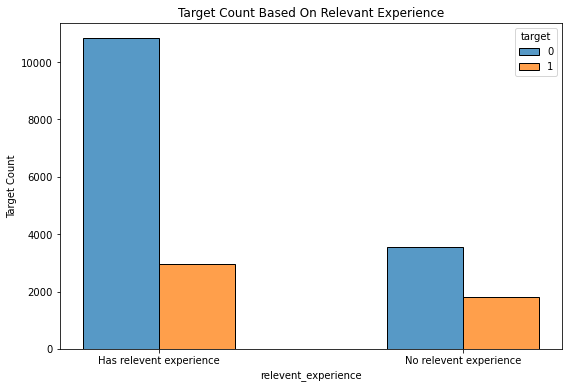

In [37]:
# see relationship with target value
sns.histplot(data=train1, x='relevent_experience', hue='target', multiple='dodge',
             shrink=0.5)
plt.ylabel('Target Count')
plt.title('Target Count Based On Relevant Experience')

Like the case of `male` in `gender` column, candidates who already has relevant exprience to the job make up a high percentage, but not many of them really want to work for our company. Whereas candidates who has no relevant experience (maybe new graduate students) are more promising (half of them really want the job).

In [38]:
# encode this feature
oe_rel_exp = OrdinalEncoder()
oe_rel_exp.fit(train1.relevent_experience.values.reshape(-1,1))
df1['rel_exp_encoded'] = oe_rel_exp.transform(df1.relevent_experience.values.reshape(-1,1))
pd.concat((df1.relevent_experience, df1.rel_exp_encoded), axis=1)

relevent_experience  rel_exp_encoded
enrollee_id                                          
8949         Has relevent experience              0.0
29725         No relevent experience              1.0
11561         No relevent experience              1.0
33241         No relevent experience              1.0
666          Has relevent experience              0.0
...                              ...              ...
1289          No relevent experience              1.0
195          Has relevent experience              0.0
31762         No relevent experience              1.0
7873         Has relevent experience              0.0
12215        Has relevent experience              0.0

[21287 rows x 2 columns]

## Enrolled University

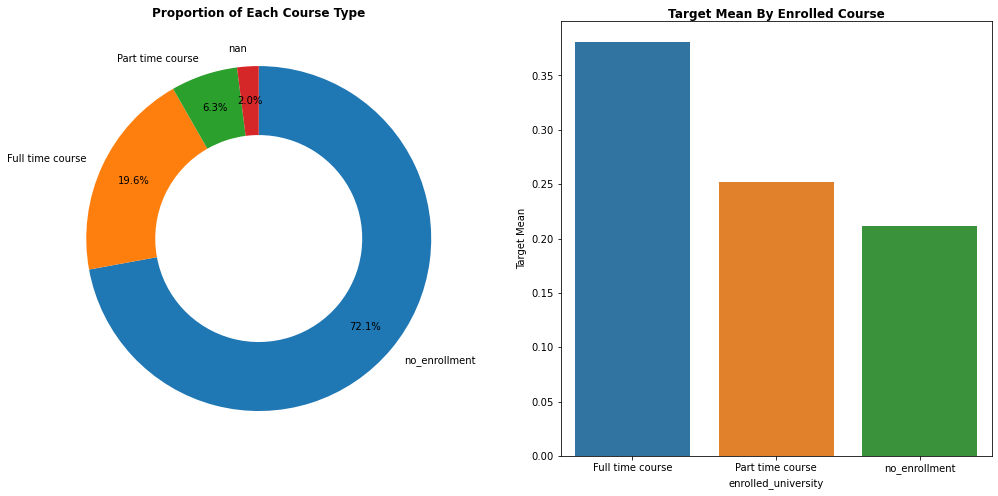

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,8))
# plot the proportion of each course type
enrolled_uni_count = train1.enrolled_university.value_counts(dropna=False)
ax1.pie(enrolled_uni_count,labels=enrolled_uni_count.index,startangle=90,counterclock=False,
        wedgeprops={'width':0.4}, autopct = "%1.1f%%", pctdistance=0.80);
ax1.set_title('Proportion of Each Course Type', fontsize=12, fontweight='bold')
# relationship of course type with the target value
mean_target_by_course = train1.groupby('enrolled_university', dropna=False).agg({'target':np.mean})
sns.barplot(x=mean_target_by_course.index, y=mean_target_by_course.target, ax=ax2)
ax2.set_ylabel('Target Mean')
ax2.set_title('Target Mean By Enrolled Course', fontsize=12, fontweight='bold', pad=0.8);

I do not clearly understand the meaning of this feature, so its quite hard to draw some conclusions.

We'll use `factorize` here to encode this feature

In [40]:
labels, uniques = pd.factorize(df1.enrolled_university, na_sentinel=-1)
labels = labels.astype(float)
labels[labels==-1] = np.nan
df1['enrolled_uni_encoded'] = labels
df1[['enrolled_university', 'enrolled_uni_encoded']]

enrolled_university  enrolled_uni_encoded
enrollee_id                                          
8949              no_enrollment                   0.0
29725             no_enrollment                   0.0
11561          Full time course                   1.0
33241                       NaN                   NaN
666               no_enrollment                   0.0
...                         ...                   ...
1289              no_enrollment                   0.0
195               no_enrollment                   0.0
31762             no_enrollment                   0.0
7873           Full time course                   1.0
12215             no_enrollment                   0.0

[21287 rows x 2 columns]

The `factorized` method provides the functionality as `OrdinalEncoder`, but allow for `NaN`.

## Education Level

In [41]:
plot_pie_chart_plotly(df1.education_level)
print(df1.education_level.value_counts(dropna=False))

Graduate          12867
Masters            4857
High School        2239
NaN                 512
Phd                 468
Primary School      344
Name: education_level, dtype: int64


Graduate: tốt nghiệp đại học

Master: Thạc sĩ

Phd: Tiến sĩ, cao nhất

We can see that some people only completed primary school, but still manage to have the skills to apply for a job as a data scientist ! Amazing ! The vast mojority has an university degree

In [42]:
# encode this column
temp = df1.education_level.copy()
edu_level = [['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']]
oe_edu_level = OrdinalEncoder(categories=edu_level, handle_unknown='use_encoded_value', unknown_value=np.nan)
z = oe_edu_level.fit_transform(temp.dropna().values.reshape(-1,1))
print(z)
len(z)

[[2.]
 [2.]
 [2.]
 ...
 [0.]
 [1.]
 [3.]]


20775

In [43]:
notna_idx = temp[temp.notna()].index
temp[notna_idx] = z.ravel()

In [44]:
df1.education_level.value_counts(dropna=False)

Graduate          12867
Masters            4857
High School        2239
NaN                 512
Phd                 468
Primary School      344
Name: education_level, dtype: int64

In [45]:
temp.value_counts(dropna=False)

2.0    12867
3.0     4857
1.0     2239
NaN      512
4.0      468
0.0      344
Name: education_level, dtype: int64

That's a bit of a pain while trying to use `OrdinalEncoder` on data with null values. But we have what we want, anyway.

In [46]:
df1['edu_level_encoded'] = temp
df1[['education_level', 'edu_level_encoded']]

education_level edu_level_encoded
enrollee_id                                  
8949               Graduate               2.0
29725              Graduate               2.0
11561              Graduate               2.0
33241              Graduate               2.0
666                 Masters               3.0
...                     ...               ...
1289               Graduate               2.0
195                 Masters               3.0
31762        Primary School               0.0
7873            High School               1.0
12215               Masters               3.0

[21287 rows x 2 columns]

This is the simple way. You can substitute for it if you want.

In [47]:
# def edu_level_encoder(x):
#     if x=='Primary School':
#         return 0
#     if x=='High School':
#         return 1
#     if x=='Graduate':
#         return 2
#     if x=='Masters':
#         return 3
#     if x=='Phd':
#         return 4
#     if x==None:
#         return None

# df1['edu_level_encoded'] = df.education_level.apply(lambda x: edu_level_encoder(x))
# df1[['education_level', 'edu_level_encoded']]

## Major Discipline 

Major Discipline: a particular area of study, especially a subject studied at a college or university

In [48]:
# see the proportion of each type
discipline_cat = df.major_discipline.value_counts(dropna=False) / len(df) * 100
discipline_cat

# STEM stands for Science - Technology - Engineering - Math

STEM               75.694086
NaN                14.680321
Humanities          3.518579
Other               1.977733
Business Degree     1.709964
Arts                1.268380
No Major            1.150937
Name: major_discipline, dtype: float64

In [49]:
px.pie(discipline_cat, names = discipline_cat.index, values=discipline_cat,
       title = 'Major Discipline')

Because this is a data scientist job, candidates who have a background in math, technology, engineering are prevalent. I was a bit surprised that there's still a minority part of candidates who study Arts as their major discipline.

Text(0.5, 0, 'Target Mean')

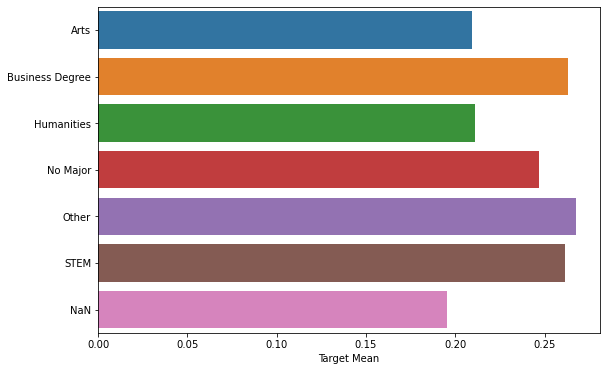

In [50]:
# see the relationship with target value

mean_target_by_discipline = train.groupby('major_discipline', dropna=False).agg({'target': np.mean})
# edit the index to plot the null part
edited_index = list(mean_target_by_discipline.index)
edited_index[6] = 'NaN'
mean_target_by_discipline.index = edited_index
# plot
sns.barplot(y=mean_target_by_discipline.index, x=mean_target_by_discipline.target)
plt.xlabel('Target Mean')

Because most of the discipline we know is `STEM`, and other disciplines are as little as about 8% in total, we can think of dividing that column into 2 parts: `STEM` and `not STEM`

In [51]:
temp = df1.major_discipline.copy()
temp[(temp!='STEM') & (temp.notna())]= 'not STEM'
print('Proportion of Each Type')
print()
print(temp.value_counts(dropna=False) / len(temp) * 100)

def major_discipline_encode(x):
    if x=='STEM':
        return 1
    if x=='not STEM':
        return 0

df1['major_dis_encoded'] = temp.apply(lambda x: major_discipline_encode(x))
pd.concat((df1.major_discipline, df1.major_dis_encoded), axis=1)

Proportion of Each Type

STEM        75.694086
NaN         14.680321
not STEM     9.625593
Name: major_discipline, dtype: float64


major_discipline  major_dis_encoded
enrollee_id                                    
8949                    STEM                1.0
29725                   STEM                1.0
11561                   STEM                1.0
33241        Business Degree                0.0
666                     STEM                1.0
...                      ...                ...
1289              Humanities                0.0
195                     STEM                1.0
31762                    NaN                NaN
7873                     NaN                NaN
12215                   STEM                1.0

[21287 rows x 2 columns]

Text(0, 0.5, 'Target Count')

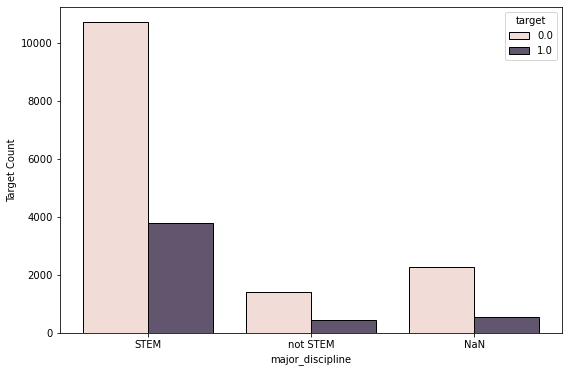

In [52]:
# see the relationship again after division
sns.histplot(x=temp.fillna('NaN'), hue=df1.target, multiple='dodge', shrink=0.8)
plt.ylabel('Target Count')

In [53]:
# correlation with target value

## Experience

This column tells us how many years a candidate has been working in the field

In [54]:
# this is a categorical column
exp_cat = train.experience.value_counts(dropna=False)
exp_cat

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

We'll divide this column into 4 categories: <5, 5-10, 10-20 and >20, and put it in a new column named `exp_cat_reduced`

In [55]:
def exp_categorize(x):
    if x=='>20':
        return '>20'
    elif x=='<1':
        return '<5'
    elif x=='NaN':
        return np.nan
    else:
        x = int(x)
        if 1<=x<5: 
            return '<5'
        if 5<=x<10:
            return '5-10'
        if 10<=x<=20:
            return '10-20'

df1['exp_cat_reduced'] = df1.experience.fillna('NaN').apply(lambda x: exp_categorize(x))
pd.concat((df1.experience, df1.exp_cat_reduced), axis=1)

experience exp_cat_reduced
enrollee_id                           
8949               >20             >20
29725               15           10-20
11561                5            5-10
33241               <1              <5
666                >20             >20
...                ...             ...
1289                16           10-20
195                 18           10-20
31762                3              <5
7873                 7            5-10
12215               15           10-20

[21287 rows x 2 columns]

In [56]:
plot_pie_chart_plotly(df1.exp_cat_reduced)

Four slices of the pie are nearly equal --> Candidates come from different age groups.

In [57]:
# encode this feature
def exp_cat_encoder(x):
    if x=='NaN':
        return np.nan
    if x=='<5':
        return 0
    if x=='5-10':
        return 1
    if x=='10-20':
        return 2
    if x=='>20':
        return 3
    
df1['exp_cat_encoded'] = df1.exp_cat_reduced.fillna('NaN').apply(lambda x: exp_cat_encoder(x))
pd.concat((df1.exp_cat_reduced, df1.exp_cat_encoded), axis=1)

exp_cat_reduced  exp_cat_encoded
enrollee_id                                 
8949                    >20              3.0
29725                 10-20              2.0
11561                  5-10              1.0
33241                    <5              0.0
666                     >20              3.0
...                     ...              ...
1289                  10-20              2.0
195                   10-20              2.0
31762                    <5              0.0
7873                   5-10              1.0
12215                 10-20              2.0

[21287 rows x 2 columns]

## Company Size

In [58]:
# company size
plot_pie_chart_plotly(train1.company_size)

In [59]:
train1.company_size.value_counts(dropna=False)

NaN          5938
50-99        3083
100-500      2571
10000+       2019
Oct-49       1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

There's a lot of null values in this column

In [60]:
# create a copy of this column and do some cleaning
temp = df1.company_size.copy()
temp[temp.isna()] = 'nan'
temp[temp=='10/49'] = '10-49'
temp[temp=='Oct-49'] = '10-49'

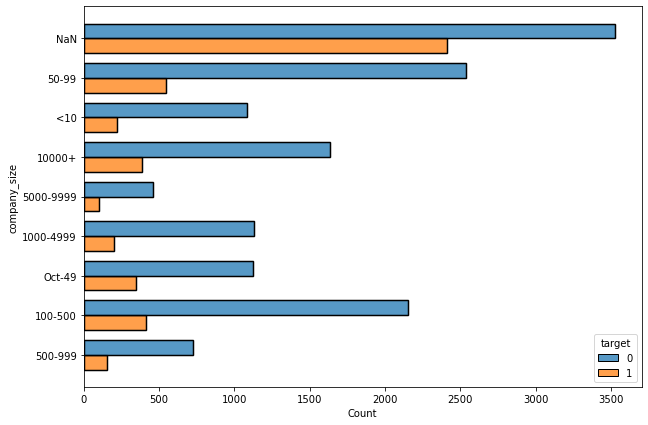

In [61]:
# see the relationship with target value
plt.figure(figsize=(10,7))
sns.histplot(data=train1, y=train1.company_size.fillna('NaN'), hue='target', 
             multiple='dodge', shrink=.75);

Candidates who does not provide their company size turn out to be more potential

In [62]:
# encode this feature
# since there's a lot of null in this column, I'll treat it as a new category
size_level = [['<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+', 'nan']]
oe_com_size = OrdinalEncoder(categories=size_level)
encoded = oe_com_size.fit_transform(temp.values.reshape(-1,1))
df1['com_size_encoded'] = encoded
df1[['company_size', 'com_size_encoded']]

company_size  com_size_encoded
enrollee_id                               
8949                 NaN               8.0
29725              50-99               2.0
11561                NaN               8.0
33241                NaN               8.0
666                50-99               2.0
...                  ...               ...
1289                 NaN               8.0
195                  NaN               8.0
31762                NaN               8.0
7873             100-500               3.0
12215             10000+               7.0

[21287 rows x 2 columns]

## Company Type

In [63]:
plot_pie_chart_plotly(train1.company_type)

In [64]:
train1.company_type.value_counts(dropna=False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

Text(0.5, 1.0, 'Target Mean By Company Type')

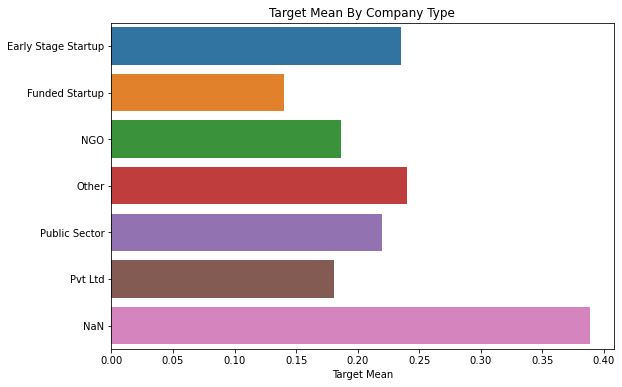

In [65]:
# see relationship with target value

mean_target_by_com_type = train1.groupby('company_type', dropna=False)['target'].mean()
# do some cleaning for seaborn to plot null data
temp_idx = list(mean_target_by_com_type.index)
temp_idx[6] = 'NaN'
mean_target_by_com_type.index = temp_idx
# plot
sns.barplot(y=mean_target_by_com_type.index, x=mean_target_by_com_type)
plt.xlabel('Target Mean')
plt.title('Target Mean By Company Type')

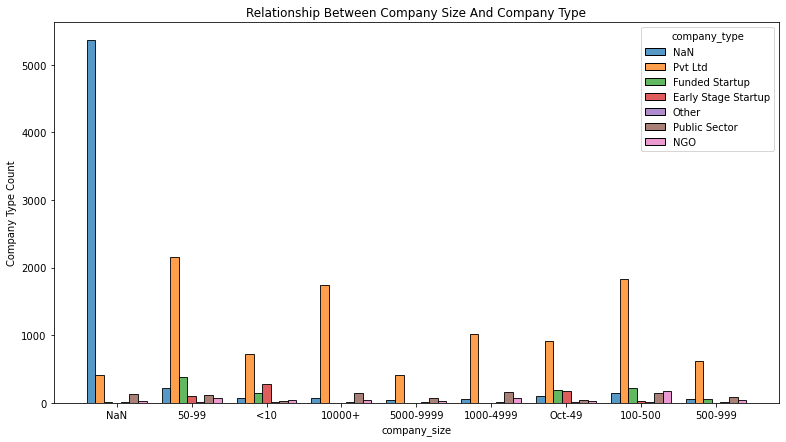

In [66]:
# Relationship Between Company Size And Company Type
plt.figure(figsize=(13,7))
plt.title('Relationship Between Company Size And Company Type')
plt.ylabel('Company Type Count')
sns.histplot(x=train1.company_size.fillna('NaN'), hue=train1.company_type.fillna('NaN'), multiple='dodge',
             shrink=0.8);

We can see an interesting pattern: Candidate who does not provide their company size usually does not tell their company type, either.

Since `company_type` doesn't seem to have any order, I'll use `OneHotEncoder` here. And because there're so many nulls in this column, I think we should treat null as a new category.

In [67]:
from sklearn.preprocessing import OneHotEncoder

# one-hot encoder
ohe_com_type = OneHotEncoder()
ohe_com_type.fit(train1.company_type.values.reshape(-1,1))
Z = ohe_com_type.transform(df1.company_type.values.reshape(-1,1)).toarray()
# append the dummy attributes to the dataframe
dummy_cols = ['dummy1', 'dummy2', 'dummy3', 'dummy4', 'dummy5', 'dummy6', 'dummy7']
dummy_df = pd.DataFrame(Z, columns=dummy_cols, index = df1.index)
df1 = pd.concat((df1, dummy_df), axis=1)
df1

city  city_development_index gender      relevent_experience  \
enrollee_id                                                                     
8949         city_103                   0.920   Male  Has relevent experience   
29725         city_40                   0.776   Male   No relevent experience   
11561         city_21                   0.624    NaN   No relevent experience   
33241        city_115                   0.789    NaN   No relevent experience   
666          city_162                   0.767   Male  Has relevent experience   
...               ...                     ...    ...                      ...   
1289         city_103                   0.920   Male   No relevent experience   
195          city_136                   0.897   Male  Has relevent experience   
31762        city_100                   0.887   Male   No relevent experience   
7873         city_102                   0.804   Male  Has relevent experience   
12215        city_102                   0.804   Male  Has relevent experience   

            enrolled_university education_level major_discipline experience  \
enrollee_id                                                                   
8949              no_enrollment        Graduate             STEM        >20   
29725             no_enrollment        Graduate             STEM         15   
11561          Full time course        Graduate             STEM          5   
33241                       NaN        Graduate  Business Degree         <1   
666               no_enrollment         Masters             STEM        >20   
...                         ...             ...              ...        ...   
1289              no_enrollment        Graduate       Humanities         16   
195               no_enrollment         Masters             STEM         18   
31762             no_enrollment  Primary School              NaN          3   
7873           Full time course     High School              NaN          7   
12215             no_enrollment         Masters             STEM         15   

            company_size    company_type  ... exp_cat_reduced  \
enrollee_id                               ...                   
8949                 NaN             NaN  ...             >20   
29725              50-99         Pvt Ltd  ...           10-20   
11561                NaN             NaN  ...            5-10   
33241                NaN         Pvt Ltd  ...              <5   
666                50-99  Funded Startup  ...             >20   
...                  ...             ...  ...             ...   
1289                 NaN   Public Sector  ...           10-20   
195                  NaN             NaN  ...           10-20   
31762                NaN         Pvt Ltd  ...              <5   
7873             100-500   Public Sector  ...            5-10   
12215             10000+         Pvt Ltd  ...           10-20   

             exp_cat_encoded  com_size_encoded  dummy1  dummy2  dummy3  \
enrollee_id                                                              
8949                     3.0               8.0     0.0     0.0     0.0   
29725                    2.0               2.0     0.0     0.0     0.0   
11561                    1.0               8.0     0.0     0.0     0.0   
33241                    0.0               8.0     0.0     0.0     0.0   
666                      3.0               2.0     0.0     1.0     0.0   
...                      ...               ...     ...     ...     ...   
1289                     2.0               8.0     0.0     0.0     0.0   
195                      2.0               8.0     0.0     0.0     0.0   
31762                    0.0               8.0     0.0     0.0     0.0   
7873                     1.0               3.0     0.0     0.0     0.0   
12215                    2.0               7.0     0.0     0.0     0.0   

             dummy4 dummy5  dummy6 dummy7  
enrollee_id                                
8949            0.0    0.0     0.0    

In [68]:
ohe_com_type.categories_

[array(['Early Stage Startup', 'Funded Startup', 'NGO', 'Other',
        'Public Sector', 'Pvt Ltd', nan], dtype=object)]

## Last New Job

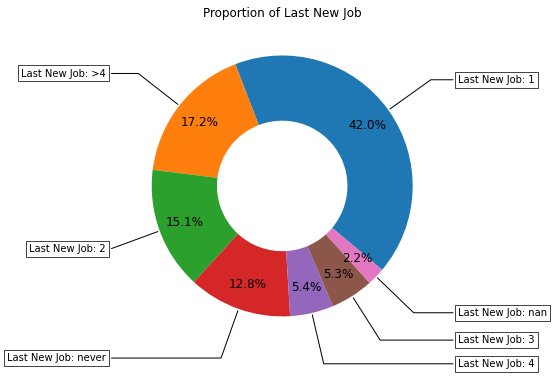

In [69]:
# plot a donut with annotation
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
val_count = train1.last_new_job.value_counts(dropna=False)
years = ['Last New Job: ' + str(val) for val in list(val_count.index)]
wedges, texts, _ = ax.pie(val_count, labels=None, wedgeprops=dict(width=0.5), startangle=-40,
                       autopct = "%1.1f%%", pctdistance=0.80,
                       textprops=dict(size=12))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(years[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Proportion of Last New Job")

plt.show()

In [70]:
train1.last_new_job.value_counts(dropna=False)

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
NaN       423
Name: last_new_job, dtype: int64

<AxesSubplot:title={'center':'Target Count By Last New Job'}, xlabel='last_new_job', ylabel='Target Count'>

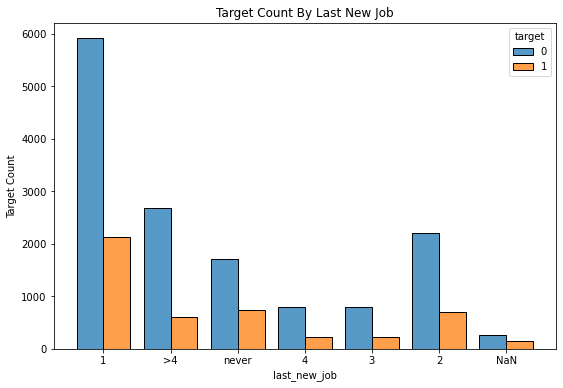

In [71]:
# see relationship with target value
plt.title('Target Count By Last New Job')
plt.ylabel('Target Count')
sns.histplot(x=train1.last_new_job.fillna('NaN'), hue=train.target, multiple='dodge', shrink=.8)

Candidates whose never get a job are more likely to be positive. On the contrary, candidates who haven't changed their jobs in the last 4 years appear to be quite satisfied with their current employment. 

In [72]:
# encode this column
temp = df1.last_new_job.copy()
temp[temp=='>4'] = 6
temp[temp=='never'] = 0
temp = temp.astype(float)
df1['last_job_encoded'] = temp
pd.concat((df1.last_new_job, df1.last_job_encoded), axis=1)

last_new_job  last_job_encoded
enrollee_id                               
8949                   1               1.0
29725                 >4               6.0
11561              never               0.0
33241              never               0.0
666                    4               4.0
...                  ...               ...
1289                   4               4.0
195                    2               2.0
31762              never               0.0
7873                   1               1.0
12215                  2               2.0

[21287 rows x 2 columns]

## Training Hours

In [73]:
train.training_hours.describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

<AxesSubplot:xlabel='training_hours', ylabel='Count'>

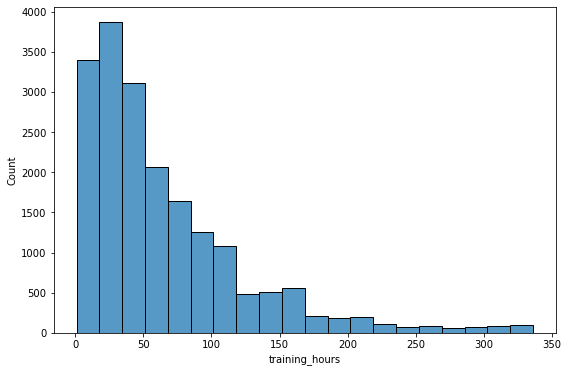

In [74]:
# distribution of training hours
sns.histplot(train.training_hours, bins=20)

In [75]:
# see the correlation with target value
train1.groupby('target').agg({'training_hours': [np.mean, np.std]})

training_hours           
                 mean        std
target                          
0           66.113761  60.938937
1           63.118484  57.273662

Text(0.5, 1.0, 'Training Hours of Positive Candidates')

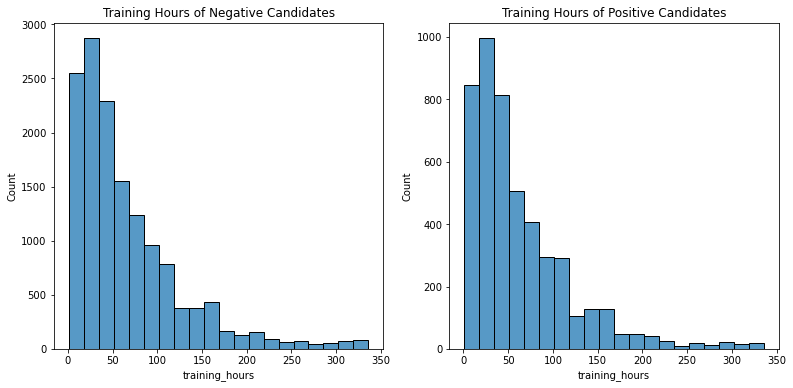

In [76]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(train.training_hours[train.target==0], bins=20)
plt.title('Training Hours of Negative Candidates')
plt.subplot(1,2,2)
sns.histplot(train.training_hours[train.target==1], bins=20)
plt.title('Training Hours of Positive Candidates')

In [77]:
train1.training_hours.corr(train1.target)

-0.021577249713613262

3 histograms (2 for each type of candidates and 1 for all candidates) are almost identical. We might think people who participate in more training must be willing to take the job, but that's not the case here.

## Drop Original Columns

After go through, visualize and process all the columns, its time to drop the original, non-processed columns and only keep the new ones as data to feed to our model.

In [78]:
df1.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target', 'gender_encoded', 'city_encoded',
       'rel_exp_encoded', 'enrolled_uni_encoded', 'edu_level_encoded',
       'major_dis_encoded', 'exp_cat_reduced', 'exp_cat_encoded',
       'com_size_encoded', 'dummy1', 'dummy2', 'dummy3', 'dummy4', 'dummy5',
       'dummy6', 'dummy7', 'last_job_encoded'],
      dtype='object')

In [79]:
cols_to_drop = [df1.columns[0]] + list(df1.columns[2:11]) + [df1.columns[12]] + [df1.columns[19]]
cols_to_drop

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'target',
 'exp_cat_reduced']

In [80]:
train_encoded = df1.drop(columns=cols_to_drop, axis=1).iloc[:(last_train_index+1)]
target = train.target
test_encoded = df1.drop(columns=cols_to_drop, axis=1).iloc[(last_train_index+1):]

In [81]:
train_encoded

city_development_index  training_hours  gender_encoded  \
enrollee_id                                                           
8949                          0.920              36             0.0   
29725                         0.776              47             0.0   
11561                         0.624              83             NaN   
33241                         0.789              52             NaN   
666                           0.767               8             0.0   
...                             ...             ...             ...   
7386                          0.878              42             0.0   
31398                         0.920              52             0.0   
24576                         0.920              44             0.0   
5756                          0.802              97             0.0   
23834                         0.855             127             NaN   

             city_encoded  rel_exp_encoded  enrolled_uni_encoded  \
enrollee_id                                                        
8949                  5.0              0.0                   0.0   
29725                77.0              1.0                   0.0   
11561                64.0              1.0                   1.0   
33241                14.0              1.0                   NaN   
666                  50.0              0.0                   0.0   
...                   ...              ...                   ...   
7386                 55.0              1.0                   0.0   
31398                 5.0              0.0                   0.0   
24576                 5.0              0.0                   0.0   
5756                 94.0              0.0                   0.0   
23834                95.0              1.0                   0.0   

            edu_level_encoded  major_dis_encoded  exp_cat_encoded  \
enrollee_id                                                         
8949                      2.0                1.0              3.0   
29725                     2.0                1.0              2.0   
11561                     2.0                1.0              1.0   
33241                     2.0                0.0              0.0   
666                       3.0                1.0              3.0   
...                       ...                ...              ...   
7386                      2.0                0.0              2.0   
31398                     2.0                1.0              2.0   
24576                     2.0                1.0              3.0   
5756                      1.0                NaN              0.0   
23834                     0.0                NaN              0.0   

             com_size_encoded  dummy1  dummy2  dummy3  dummy4  dummy5  dummy6  \
enrollee_id                                                                     
8949                      8.0     0.0     0.0     0.0     0.0     0.0     0.0   
29725                     2.0     0.0     0.0     0.0     0.0     0.0     1.0   
11561                     8.0     0.0     0.0     0.0     0.0     0.0     0.0   
33241                     8.0     0.0     0.0     0.0     0.0     0.0     1.0   
666                       2.0     0.0     1.0     0.0     0.0     0.0     0.0   
...                       ...     ...     ...     ...     ...     ...     ...   
7386                      8.0     0.0     0.0     0.0     0.0     0.0     0.0   
31398                     8.0     0.0     0.0     0.0     0.0     0.0     0.0   
24576                     2.0     0.0     0.0     0.0     0.0     0.0     1.0   
5756                      4.0     0.0     0.0     0.0     0.0     0.0     1.0   
23834                     8.0     0.0     0.0     0.0     0.0     0.0     0.0   

             dummy7  last_job_encoded  
enrollee_id                            
8949            1.0               1.0  
29725           0.0               6.0  
11561           1.0               0.0  
33241           0.0               0.0  
666         

In [82]:
target.value_counts(dropna=False)

0    14381
1     4777
Name: target, dtype: int64

In [83]:
test_encoded

city_development_index  training_hours  gender_encoded  \
enrollee_id                                                           
32403                         0.827              21             0.0   
9858                          0.920              98             1.0   
31806                         0.624              15             0.0   
27385                         0.827              39             0.0   
27724                         0.920              72             0.0   
...                             ...             ...             ...   
1289                          0.920              15             0.0   
195                           0.897              30             0.0   
31762                         0.887              18             0.0   
7873                          0.804              84             0.0   
12215                         0.804              11             0.0   

             city_encoded  rel_exp_encoded  enrolled_uni_encoded  \
enrollee_id                                                        
32403                78.0              0.0                   1.0   
9858                  5.0              0.0                   0.0   
31806                64.0              1.0                   0.0   
27385                26.0              0.0                   0.0   
27724                 5.0              0.0                   0.0   
...                   ...              ...                   ...   
1289                  5.0              1.0                   0.0   
195                  30.0              0.0                   0.0   
31762                 2.0              1.0                   0.0   
7873                  4.0              0.0                   1.0   
12215                 4.0              0.0                   0.0   

            edu_level_encoded  major_dis_encoded  exp_cat_encoded  \
enrollee_id                                                         
32403                     2.0                1.0              1.0   
9858                      2.0                1.0              1.0   
31806                     1.0                NaN              0.0   
27385                     3.0                1.0              2.0   
27724                     2.0                1.0              3.0   
...                       ...                ...              ...   
1289                      2.0                0.0              2.0   
195                       3.0                1.0              2.0   
31762                     0.0                NaN              0.0   
7873                      1.0                NaN              1.0   
12215                     3.0                1.0              2.0   

             com_size_encoded  dummy1  dummy2  dummy3  dummy4  dummy5  dummy6  \
enrollee_id                                                                     
32403                     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9858                      8.0     0.0     0.0     0.0     0.0     0.0     1.0   
31806                     8.0     0.0     0.0     0.0     0.0     0.0     1.0   
27385                     1.0     0.0     0.0     0.0     0.0     0.0     1.0   
27724                     7.0     0.0     0.0     0.0     0.0     0.0     1.0   
...                       ...     ...     ...     ...     ...     ...     ...   
1289                      8.0     0.0     0.0     0.0     0.0     1.0     0.0   
195                       8.0     0.0     0.0     0.0     0.0     0.0     0.0   
31762                     8.0     0.0     0.0     0.0     0.0     0.0     1.0   
7873                      3.0     0.0     0.0     0.0     0.0     1.0     0.0   
12215                     7.0     0.0     0.0     0.0     0.0     0.0     1.0   

             dummy7  last_job_encoded  
enrollee_id                            
32403           1.0               1.0  
9858            0.0               1.0  
31806           0.0               0.0  
27385           0.0               1.0  
27724       

# Fill Null Values

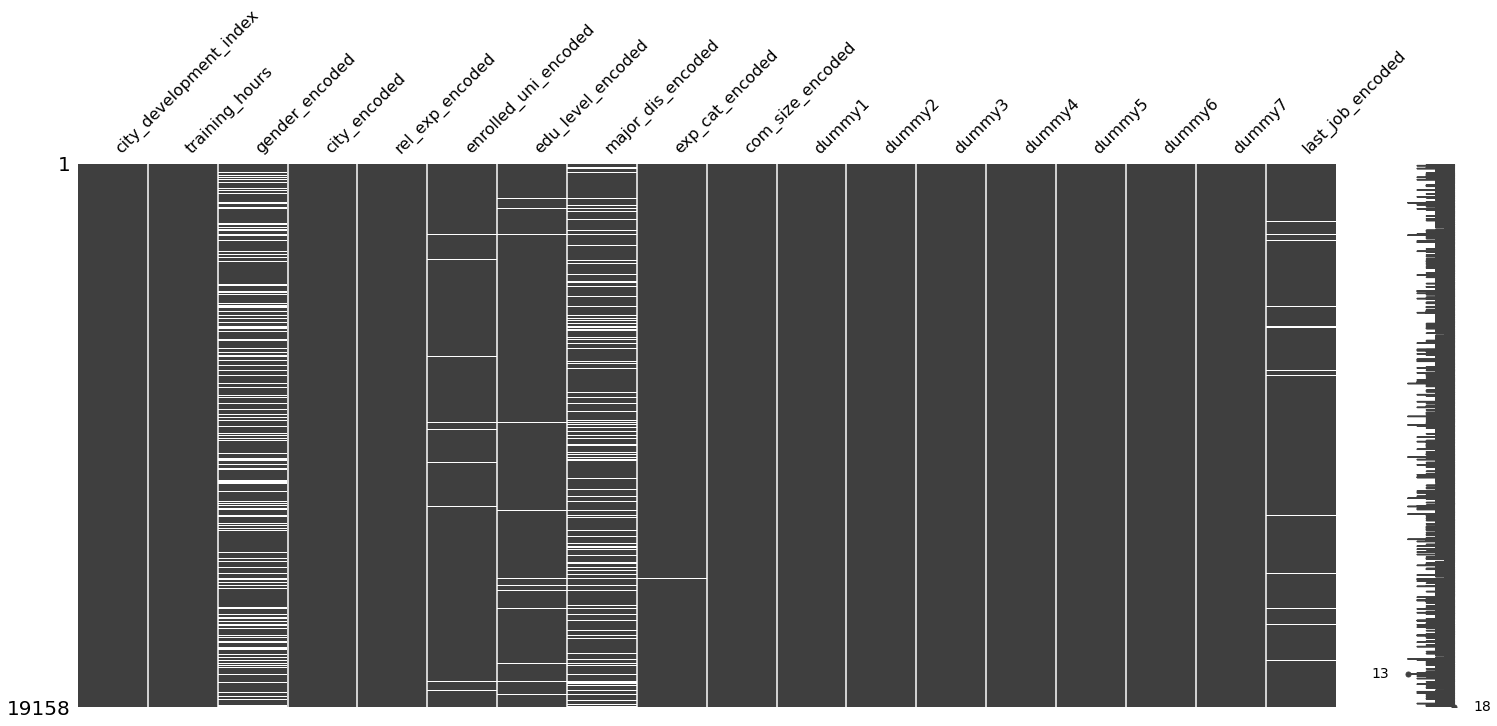

In [87]:
# examine null values
msno.matrix(train_encoded);

So `enrolled_university`, `education_level`, `experience` and `last_job_encoded` have a few null values, while `gender` and `major_discipline` have quite a lot.

## Enrolled_University, Education_Level, Experience

I'll replace missing data using the most frequent value of each column.

In [88]:
from sklearn.impute import SimpleImputer

train_prepared = train_encoded.copy()

imputer = SimpleImputer(strategy='most_frequent')
cols_to_impute = ['enrolled_uni_encoded', 'edu_level_encoded', 'exp_cat_encoded']
train_prepared[cols_to_impute] = imputer.fit_transform(train_encoded[cols_to_impute])
train_prepared

city_development_index  training_hours  gender_encoded  \
enrollee_id                                                           
8949                          0.920              36             0.0   
29725                         0.776              47             0.0   
11561                         0.624              83             NaN   
33241                         0.789              52             NaN   
666                           0.767               8             0.0   
...                             ...             ...             ...   
7386                          0.878              42             0.0   
31398                         0.920              52             0.0   
24576                         0.920              44             0.0   
5756                          0.802              97             0.0   
23834                         0.855             127             NaN   

             city_encoded  rel_exp_encoded  enrolled_uni_encoded  \
enrollee_id                                                        
8949                  5.0              0.0                   0.0   
29725                77.0              1.0                   0.0   
11561                64.0              1.0                   1.0   
33241                14.0              1.0                   0.0   
666                  50.0              0.0                   0.0   
...                   ...              ...                   ...   
7386                 55.0              1.0                   0.0   
31398                 5.0              0.0                   0.0   
24576                 5.0              0.0                   0.0   
5756                 94.0              0.0                   0.0   
23834                95.0              1.0                   0.0   

             edu_level_encoded  major_dis_encoded  exp_cat_encoded  \
enrollee_id                                                          
8949                       2.0                1.0              3.0   
29725                      2.0                1.0              2.0   
11561                      2.0                1.0              1.0   
33241                      2.0                0.0              0.0   
666                        3.0                1.0              3.0   
...                        ...                ...              ...   
7386                       2.0                0.0              2.0   
31398                      2.0                1.0              2.0   
24576                      2.0                1.0              3.0   
5756                       1.0                NaN              0.0   
23834                      0.0                NaN              0.0   

             com_size_encoded  dummy1  dummy2  dummy3  dummy4  dummy5  dummy6  \
enrollee_id                                                                     
8949                      8.0     0.0     0.0     0.0     0.0     0.0     0.0   
29725                     2.0     0.0     0.0     0.0     0.0     0.0     1.0   
11561                     8.0     0.0     0.0     0.0     0.0     0.0     0.0   
33241                     8.0     0.0     0.0     0.0     0.0     0.0     1.0   
666                       2.0     0.0     1.0     0.0     0.0     0.0     0.0   
...                       ...     ...     ...     ...     ...     ...     ...   
7386                      8.0     0.0     0.0     0.0     0.0     0.0     0.0   
31398                     8.0     0.0     0.0     0.0     0.0     0.0     0.0   
24576                     2.0     0.0     0.0     0.0     0.0     0.0     1.0   
5756                      4.0     0.0     0.0     0.0     0.0     0.0     1.0   
23834                     8.0     0.0     0.0     0.0     0.0     0.0     0.0   

             dummy7  last_job_encoded  
enrollee_id                            
8949            1.0               1.0  
29725           0.0               6.0  
11561           1.0               0.0  
33241           0.0               0.0  

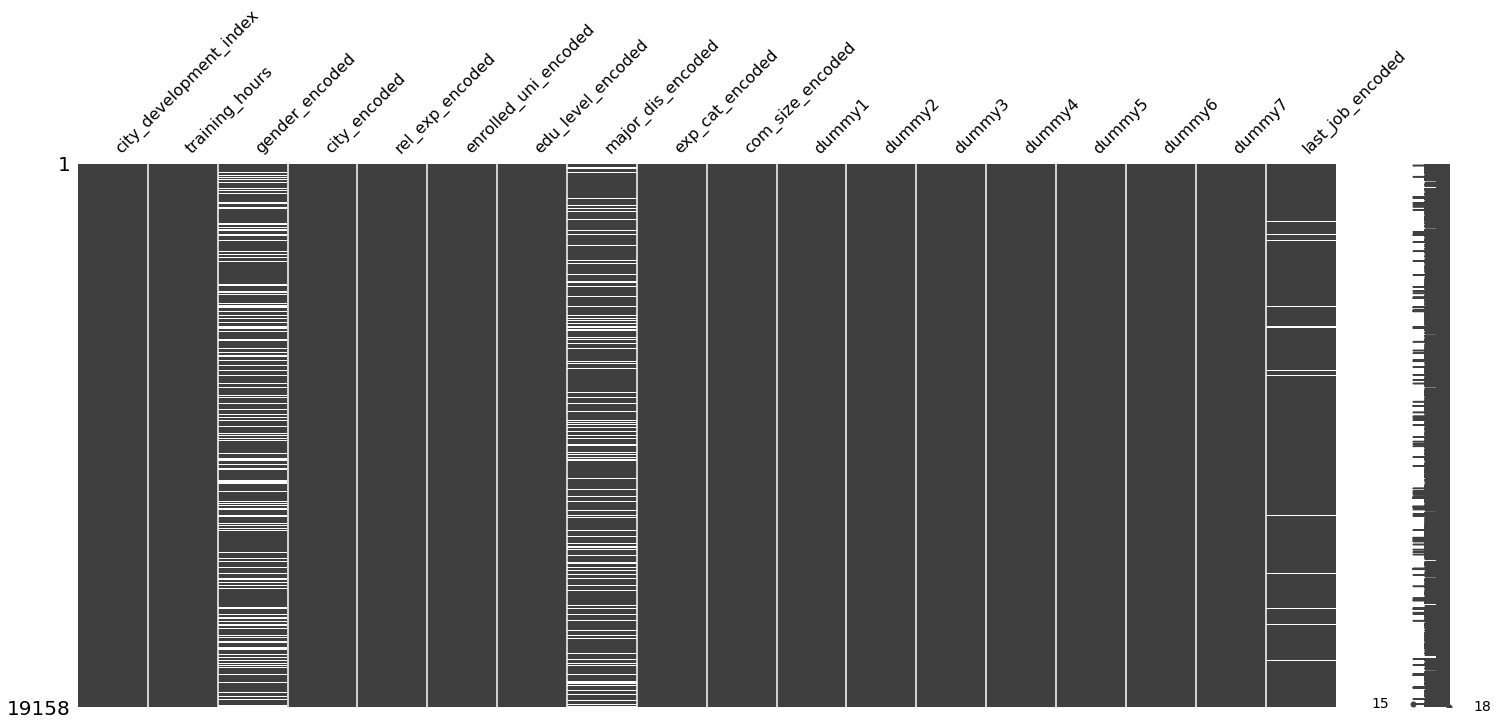

In [89]:
msno.matrix(train_prepared);

## Last New Job

I'll replace null values with `0` for this column. Maybe candidates leave out this field because they actually don't have any previous jobs.

In [90]:
train_prepared.last_job_encoded.fillna(0, inplace=True)

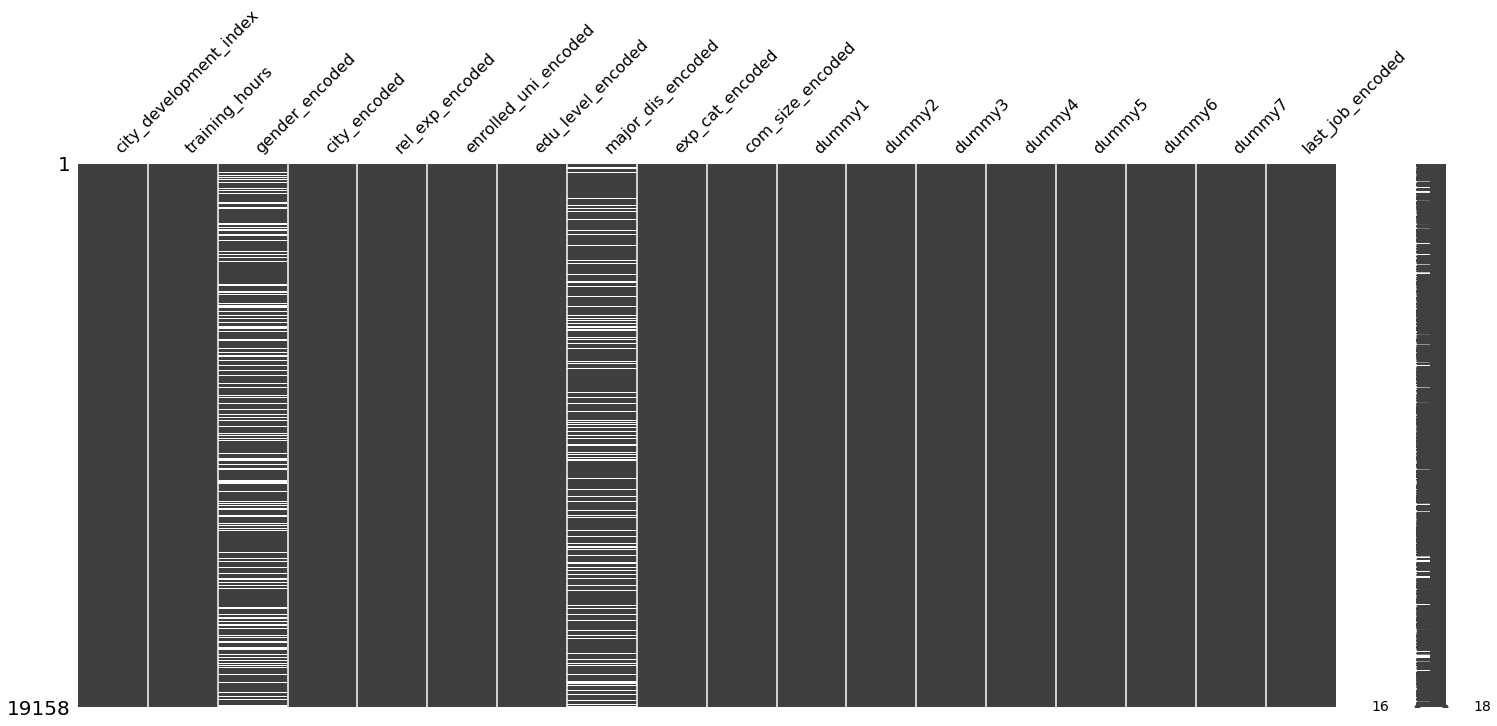

In [91]:
msno.matrix(train_prepared);

## Gender and Major Discipline

These two columns have lots of missing data. I'll try various ways of imputation to see which performs best.

The model used for evaluation is `LightGBM`. `SMOTE` technique is also used to help balance the dataset.

In [92]:
print(train_prepared.gender_encoded.value_counts(dropna=False))
print()
print(train_prepared.major_dis_encoded.value_counts(dropna=False))

0.0    13221
NaN     4508
1.0     1238
2.0      191
Name: gender_encoded, dtype: int64

1.0    14492
NaN     2813
0.0     1853
Name: major_dis_encoded, dtype: int64


In [93]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

In [94]:
# Boderline SMOTE with Tomek
# Both oversample the minority class and undersample the majority class
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

def smote_data(X,y):
    border_smt = BorderlineSMOTE(random_state=42)
    tomek_link = TomekLinks(n_jobs=-1, sampling_strategy='auto')
    steps = [('over', border_smt), ('under', tomek_link)]
    smote_pipeline = Pipeline(steps=steps)
    return smote_pipeline.fit_resample(X,y)

### Remove Rows Containing Missing Values

In [95]:
cols_with_null = ['gender_encoded', 'major_dis_encoded']
neg_idx = target[target==0].index
neg_example = train_prepared.loc[neg_idx][cols_with_null]
neg_null = neg_example[neg_example.isnull().any(axis=1)]
print(f'The number of negative example is {len(neg_idx)}')
print(f'The number of negative example with null in these 2 columns is {len(neg_null)}')

The number of negative example is 14381
The number of negative example with null in these 2 columns is 4749


In [96]:
pos_idx = target[target==1].index
pos_example = train_prepared.loc[pos_idx][cols_with_null]
pos_null = pos_example[pos_example.isnull().any(axis=1)]
print(f'The number of positive example is {len(pos_idx)}')
print(f'The number of positive example with null in these 2 columns is {len(pos_null)}')

The number of positive example is 4777
The number of positive example with null in these 2 columns is 1737


0    9632
1    3040
Name: target, dtype: int64


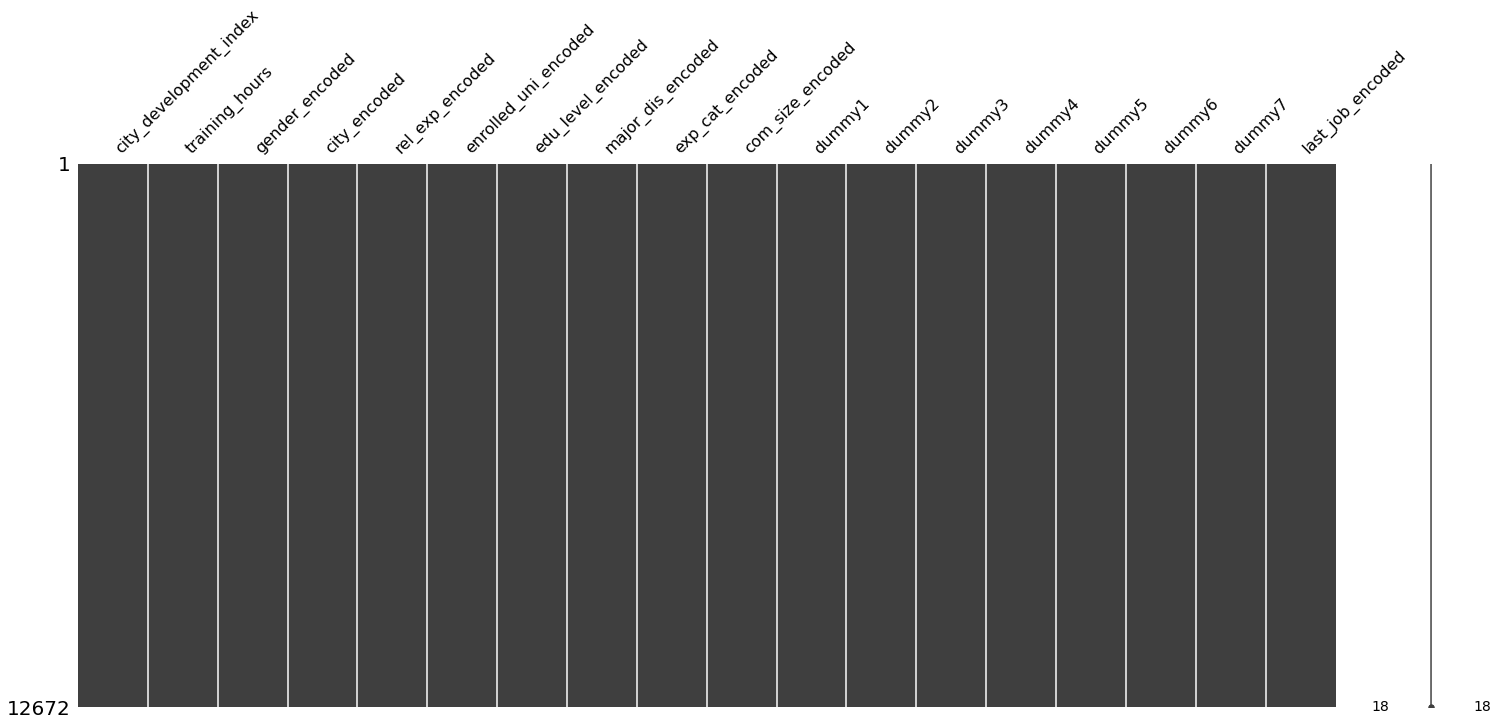

In [97]:
# drop rows with null
temp = pd.concat((train_prepared, target), axis=1)
train_drop_rows = temp.drop(columns=['target']).dropna()
target_drop_rows = temp.dropna().target
msno.matrix(train_drop_rows);
print(target_drop_rows.value_counts(dropna=False))

In [115]:
# evaluate model

# our model is lgbm
lgbm = LGBMClassifier()
# balance the dataset 
X1, y1 = smote_data(train_drop_rows, target_drop_rows)
# cross-validation test
scores_drop_rows = cross_val_score(lgbm, X1, y1, cv=10, scoring='f1', n_jobs=-1)

In [116]:
print(scores_drop_rows)
print(scores_drop_rows.mean())
print(scores_drop_rows.std())

[0.64572193 0.64329063 0.63810152 0.93238434 0.93120638 0.93333333
 0.93013972 0.93433584 0.93614882 0.93186373]
0.8456526230333523
0.1330994234560278


In [117]:
mean1 = scores_drop_rows.mean()
mean1

0.8456526230333523

### Treat Null As A Category

In [118]:
train_null_as_a_cat = train_prepared.copy()
# represent null as a category
train_null_as_a_cat.gender_encoded.fillna(3, inplace=True)
train_null_as_a_cat.major_dis_encoded.fillna(2, inplace=True)

In [125]:
# LGBM
lgbm = LGBMClassifier()
X1, y1 = smote_data(train_null_as_a_cat, target)
scores_treat_null_as_cat = cross_val_score(lgbm, X1, y1, cv=10, scoring='f1', n_jobs=-1)

In [126]:
print(scores_treat_null_as_cat)
print(scores_treat_null_as_cat.mean())
print(scores_treat_null_as_cat.std())

mean2 = scores_treat_null_as_cat.mean()

[0.65374449 0.62533693 0.65059185 0.8926198  0.9261477  0.92971888
 0.92563081 0.92450948 0.92723632 0.93494299]
0.8390479237867897
0.12883179476251622


### Fill NaN With Most Frequent Value

In [121]:
train_null_most_freq = train_prepared.copy()
# 0 is the most frequent value in gender column. Should use a SimpleImputer here
# but I'm lazy
train_null_most_freq.gender_encoded.fillna(0, inplace=True)
# 1 is the most frequent value in major discipline column.
train_null_most_freq.major_dis_encoded.fillna(1, inplace=True)

In [127]:
# LGBM
lgbm = LGBMClassifier()
X1, y1 = smote_data(train_null_most_freq, target)
scores_most_freq = cross_val_score(lgbm, X1, y1, cv=10, scoring='f1', n_jobs=-1)
print(scores_most_freq)
print(scores_most_freq.mean())
print(scores_most_freq.std())

[0.64049404 0.6278549  0.65491406 0.88951049 0.92456609 0.92871553
 0.92281991 0.92883395 0.92640693 0.93032649]
0.8374442394837459
0.1291698307893454


In [128]:
mean3 = scores_most_freq.mean()

### KNN Imputation

#### Choose Number of n_neighbors

Model used to check: LGBM Classifier

We'll try various value of `n_neighbors` to find the parameter that has the highest result

In [129]:
from lightgbm import LGBMClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [130]:
def find_n_neighbors(model, X, y):
    n_neighbor_list = range(1,10)
    f1_dict = {}
    
    for i in n_neighbor_list:
        X_copy = X.copy()
        # fill na
        imputer = KNNImputer(n_neighbors = i)
        impute_cols = [col for col in X_copy.columns if X_copy[col].isnull().any()]
        Z = imputer.fit_transform(X_copy[impute_cols])
        X_copy[impute_cols] = Z

        # data upscaling
        X_smoted, y_smoted = smote_data(X_copy, y)

        # split train and test set
        Xtrain, Xtest, ytrain, ytest = train_test_split(X_smoted, y_smoted, test_size=0.2, random_state=42)

        # fitting and testing
        model.fit(Xtrain, ytrain)
        y_pred = model.predict(Xtest)
        f1_dict[i] = f1_score(ytest, y_pred)
        
    return f1_dict

result = find_n_neighbors(LGBMClassifier(random_state=42), train_prepared, target)

In [131]:
result

{1: 0.8746849117752971,
 2: 0.8725663716814159,
 3: 0.8608494757419585,
 4: 0.869472182596291,
 5: 0.8712660028449503,
 6: 0.86794500723589,
 7: 0.8702480813849723,
 8: 0.8666666666666667,
 9: 0.8678912045213706}

In [132]:
best_n_neighbor = max(result, key=lambda k: result[k])
best_n_neighbor

1

#### Use the best parameter

In [134]:
knn_imputer = KNNImputer(n_neighbors=best_n_neighbor)
# you can call call fit_transform without declaring the columns to impute, but I do here for better performance
impute_cols = [col for col in train_prepared.columns if train_prepared[col].isnull().any()]
train_knn_imputed = train_prepared.copy()
train_knn_imputed[impute_cols] = knn_imputer.fit_transform(train_knn_imputed[impute_cols])

In [135]:
train_knn_imputed[impute_cols]

gender_encoded  major_dis_encoded
enrollee_id                                   
8949                0.00000           1.000000
29725               0.00000           1.000000
11561               0.00000           1.000000
33241               1.00000           0.000000
666                 0.00000           1.000000
...                     ...                ...
7386                0.00000           0.000000
31398               0.00000           1.000000
24576               0.00000           1.000000
5756                0.00000           1.000000
23834               0.11058           0.886632

[19158 rows x 2 columns]

In [136]:
X1, y1 = smote_data(train_knn_imputed, target)
lgbm = LGBMClassifier()
scores = cross_val_score(lgbm, X1, y1, cv=10, scoring='f1', n_jobs=-1)
print(scores)
print(scores.mean())
print(scores.std())

[0.63543061 0.638506   0.63523132 0.88943146 0.92524304 0.92816572
 0.92445923 0.92256564 0.92502499 0.93145161]
0.8355509631720629
0.1308460444743954


In [137]:
mean4 = scores.mean()

### Iterative Imputation

In [139]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer(random_state=42)
train_iterative_imputer = pd.DataFrame(iterative_imputer.fit_transform(train_prepared),
                                       columns = train_prepared.columns,
                                       index = train_prepared.index)

<AxesSubplot:>

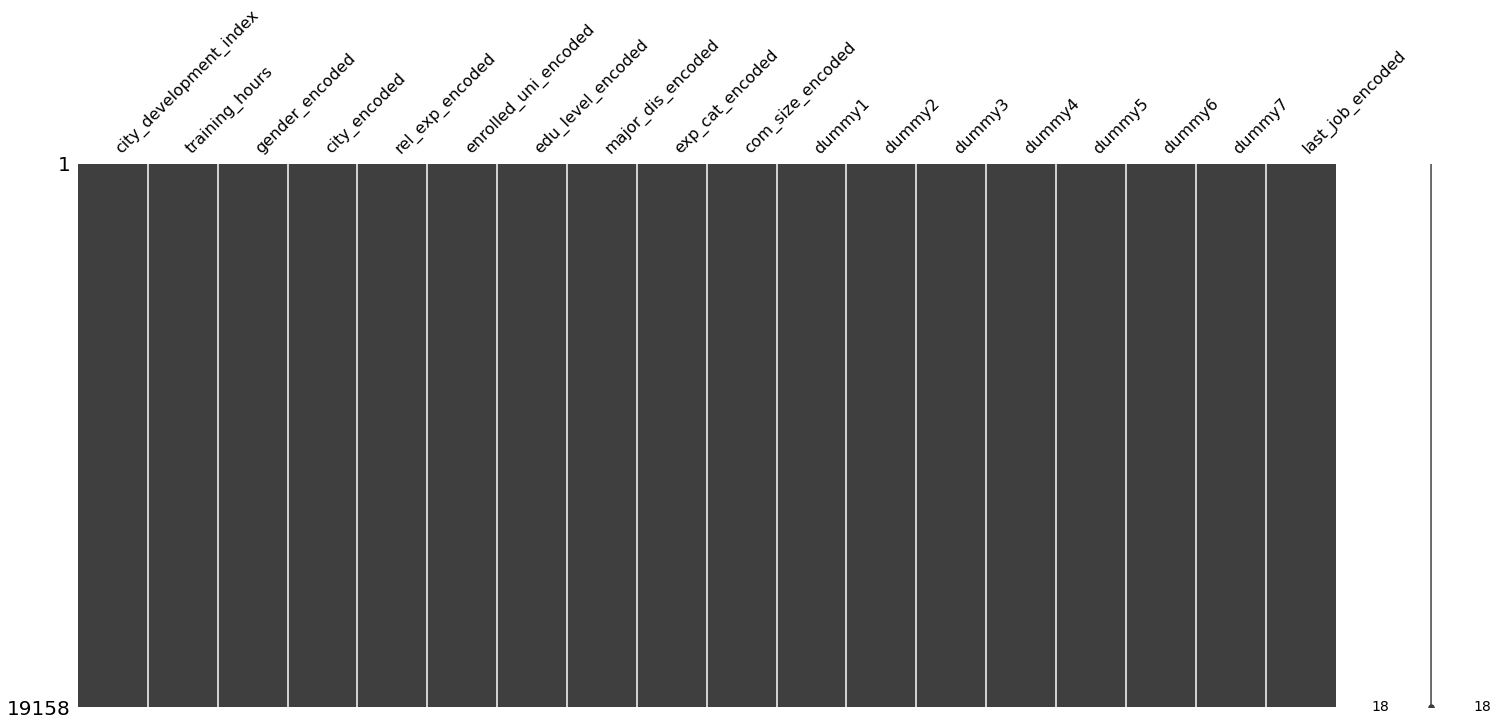

In [140]:
msno.matrix(train_iterative_imputer)

In [142]:
# below implementation of testing can cause data leakage, will fix later
# For detail, see the Iterative Imputer part of this article
# https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
lgbm = LGBMClassifier()
X1,y1 = smote_data(train_iterative_imputer, target)
scores_iter_imputer = cross_val_score(lgbm, X1, y1, cv=10, n_jobs=-1, scoring='f1')

print(scores_iter_imputer)
print(scores_iter_imputer.mean())
print(scores_iter_imputer.std())

mean5 = scores_iter_imputer.mean()

[0.64273205 0.6455863  0.64711033 0.8907563  0.92809587 0.93105756
 0.9211839  0.92440892 0.92471686 0.93324388]
0.8388891979781123
0.12732676114053884


### Build A Model To Predict Missing Value

In [98]:
# for gender column
from lightgbm import LGBMClassifier

# rows with no null in gender
train_impute_gender = train_prepared[train_prepared.gender_encoded.notna()].copy()
# rows with null in gender
need_impute_gender = train_prepared[train_prepared.gender_encoded.isna()].copy()
# prepare training set
target_impute_gender = train_impute_gender.gender_encoded
train_impute_gender.drop(columns=['gender_encoded', 'major_dis_encoded'], inplace=True)
need_impute_gender.drop(columns=['gender_encoded', 'major_dis_encoded'], inplace=True)
# fit estimator
lgbm_impute_gender = LGBMClassifier()
train_impute_gender_smoted, target_impute_gender_smoted = smote_data(train_impute_gender, target_impute_gender)
lgbm_impute_gender.fit(train_impute_gender_smoted, target_impute_gender_smoted)
# predict
need_impute_gender['gender_encoded'] = lgbm_impute_gender.predict(need_impute_gender)

In [102]:
need_impute_gender.gender_encoded.value_counts(dropna=False)

0.0    4493
1.0      13
2.0       2
Name: gender_encoded, dtype: int64

Not very promising. Since the input has a lot of `0` examples and very few `1` or `2`, the model mostly predict `0` for new examples.

## Build A Pipeline For Null Filling

Removing rows that contain `null` yields the highest result on cross validation test. But in the end, we still have to find a method to fill null values appearing in new candidates' data. So I'll go with the runner-up option: treating null as a new category for 2 columns `gender` and `major discipline`.

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

cols1 = ['enrolled_uni_encoded', 'edu_level_encoded', 'exp_cat_encoded']
cols2 = ['last_job_encoded']
cols3 = ['gender_encoded']
cols4 = ['major_dis_encoded']

fillna_pipeline = ColumnTransformer([
    ('most_freq', SimpleImputer(strategy='most_frequent'), cols1),
    ('0', SimpleImputer(strategy='constant', fill_value=0), cols2),
    ('null_as_a_cat_gender', SimpleImputer(strategy='constant', fill_value=3), cols3),
    ('null_as_a_cat_major_dis', SimpleImputer(strategy='constant', fill_value=2), cols4)
], remainder='passthrough')

train_pipelined = fillna_pipeline.fit_transform(train_encoded)

In [99]:
cols_need_impute = cols1 + cols2 + cols3 + cols4
remainder_cols = [col for col in train_encoded.columns if col not in cols_need_impute]
cols = cols_need_impute + remainder_cols
train_pipelined = pd.DataFrame(train_pipelined, columns=cols, index=train_encoded.index, 
                               dtype=float)
train_pipelined

enrolled_uni_encoded  edu_level_encoded  exp_cat_encoded  \
enrollee_id                                                             
8949                          0.0                2.0              3.0   
29725                         0.0                2.0              2.0   
11561                         1.0                2.0              1.0   
33241                         0.0                2.0              0.0   
666                           0.0                3.0              3.0   
...                           ...                ...              ...   
7386                          0.0                2.0              2.0   
31398                         0.0                2.0              2.0   
24576                         0.0                2.0              3.0   
5756                          0.0                1.0              0.0   
23834                         0.0                0.0              0.0   

             last_job_encoded  gender_encoded  major_dis_encoded  \
enrollee_id                                                        
8949                      1.0             0.0                1.0   
29725                     6.0             0.0                1.0   
11561                     0.0             3.0                1.0   
33241                     0.0             3.0                0.0   
666                       4.0             0.0                1.0   
...                       ...             ...                ...   
7386                      1.0             0.0                0.0   
31398                     4.0             0.0                1.0   
24576                     4.0             0.0                1.0   
5756                      2.0             0.0                2.0   
23834                     1.0             3.0                2.0   

             city_development_index  training_hours  city_encoded  \
enrollee_id                                                         
8949                          0.920            36.0           5.0   
29725                         0.776            47.0          77.0   
11561                         0.624            83.0          64.0   
33241                         0.789            52.0          14.0   
666                           0.767             8.0          50.0   
...                             ...             ...           ...   
7386                          0.878            42.0          55.0   
31398                         0.920            52.0           5.0   
24576                         0.920            44.0           5.0   
5756                          0.802            97.0          94.0   
23834                         0.855           127.0          95.0   

             rel_exp_encoded  com_size_encoded  dummy1  dummy2  dummy3  \
enrollee_id                                                              
8949                     0.0               8.0     0.0     0.0     0.0   
29725                    1.0               2.0     0.0     0.0     0.0   
11561                    1.0               8.0     0.0     0.0     0.0   
33241                    1.0               8.0     0.0     0.0     0.0   
666                      0.0               2.0     0.0     1.0     0.0   
...                      ...               ...     ...     ...     ...   
7386                     1.0               8.0     0.0     0.0     0.0   
31398                    0.0               8.0     0.0     0.0     0.0   
24576                    0.0               2.0     0.0     0.0     0.0   
5756                     0.0               4.0     0.0     0.0     0.0   
23834                    1.0               8.0     0.0     0.0     0.0   

             dummy4  dummy5  dummy6  dummy7  
enrollee_id                                  
8949            0.0     0.0     0.0     1.0  
29725           0.0     0.0     1.0     0.0  
11561           0.0     0.0     0.0     1.0  
33241           0.0     0.0     1.0     0.0  
666             0.0     0.0     0.0     0

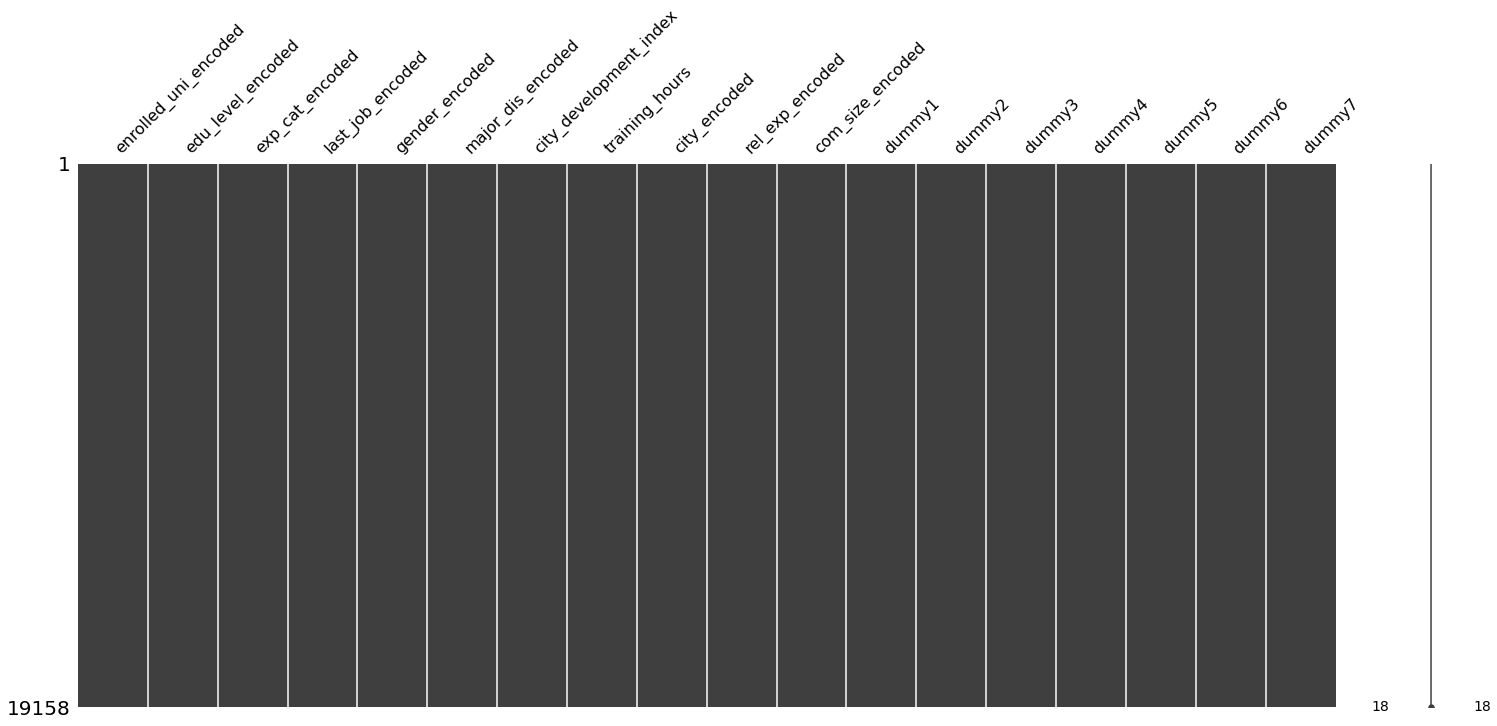

In [101]:
msno.matrix(train_pipelined);

# Train And Finetune Model

In [104]:
Xtrain = train_pipelined
ytrain = target

## Balance Data

In [88]:
print('Proportion of each class')
print(ytrain.value_counts() / len(ytrain) * 100)

Proportion of each class
0    75.065247
1    24.934753
Name: target, dtype: float64


As we can see, the negative class is three times more than the positive one. So this is an imbalance dataset, and we have to handle it. Otherwise our model will perform poorly on the minority class.

In [105]:
# use SMOTE in combination with Tomek in order to both oversample of the minority class and
# undersample of the majority one
Xtrain_smoted, ytrain_smoted = smote_data(Xtrain, ytrain)

In [188]:
ytrain_smoted.value_counts(dropna=False)

0    14381
1    14008
Name: target, dtype: int64

## Try Some Models

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import log_loss

def plot_learning_curve(model, X, y):
    # Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)
    # split train and test set
    splitter = StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2)
    for train_idx, test_idx in splitter.split(X,y):
        Xtrain, ytrain = X.loc[train_idx], y.loc[train_idx]
        Xtest, ytest = X.loc[test_idx], y.loc[test_idx]
        
    N, d = Xtrain.shape
    train_loss, test_loss = [], []
    batches = range(200, N, 200)
    
    for m in batches:
        Xsub = Xtrain.iloc[:m, :]
        ysub = ytrain.iloc[:m]
        model.fit(Xsub,ysub)
        ysub_pred = model.predict_proba(Xsub)
        train_loss.append(log_loss(ysub, ysub_pred))  # log_loss is the logistic loss function
        
        ytest_pred = model.predict_proba(Xtest)
        test_loss.append(log_loss(ytest, ytest_pred))
    
    plt.figure(figsize=(9,6))
    plt.plot(batches, train_loss, ls='-', label = 'Train Loss', c='b', marker='o')
    plt.plot(batches, test_loss, ls='-', label='Test Loss', c='r', marker='x')
    plt.xlabel('Number of examples to train')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.show()

### LGBM

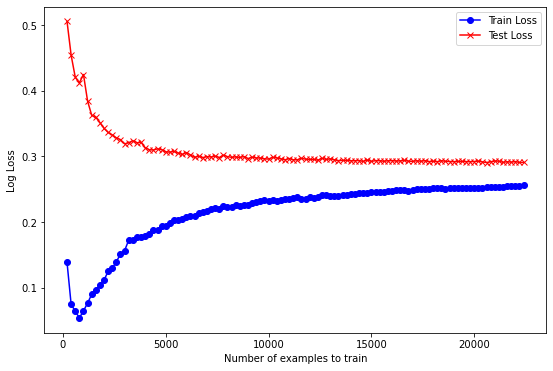

In [128]:
lgbm = LGBMClassifier()
plot_learning_curve(lgbm, pd.DataFrame(Xtrain_smoted, dtype=float), ytrain_smoted)

In [130]:
# MODEL TUNING
from sklearn.model_selection import GridSearchCV

lgbm_params = {"num_leaves": [20, 50],
               "max_depth": [5, 8],
               "learning_rate": [0.01, 0.02],
               "n_estimators": [500, 1000, 5000]}

lgbm = LGBMClassifier(random_state=42)
lgbm_cv = GridSearchCV (lgbm, lgbm_params, cv=5, n_jobs=-1, verbose=2).fit (Xtrain_smoted, ytrain_smoted)

lgbm_cv.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'num_leaves': 50}

In [131]:
result = lgbm_cv.cv_results_
result

{'mean_fit_time': array([ 2.61839833,  2.76839685,  4.52709265,  4.92981687, 20.04719019,
        22.92493858,  2.86094799,  4.31514654,  5.48834343,  8.57207627,
        23.92052112, 34.30371904,  2.41494145,  2.96310406,  4.94417863,
         5.29125128, 20.55782681, 22.56745119,  2.72571001,  4.15189366,
         5.32121596,  7.59668665, 21.06945682, 32.01792459]),
 'std_fit_time': array([0.09857515, 0.09190989, 0.05652488, 0.17093028, 0.3020553 ,
        0.33524487, 0.06899838, 0.08342333, 0.1167743 , 0.3600275 ,
        0.90298181, 1.28402274, 0.14705822, 0.20874764, 0.55141214,
        0.41041856, 0.62606489, 0.16707992, 0.13447776, 0.1894882 ,
        0.39704605, 0.35513224, 0.77858486, 3.52226629]),
 'mean_score_time': array([ 0.38716521,  0.40731196,  0.96482353,  0.99753432, 10.39768424,
        10.49280677,  0.38995843,  0.5523243 ,  1.22532434,  2.19453297,
         9.90183649, 12.49969277,  0.38177972,  0.45378747,  0.96960759,
         1.33822193,  9.38071451, 10.64096994

In [154]:
sorted_score = sorted(list(zip(result['params'], result['mean_test_score'])), key=lambda x: x[1])
for params, scores in sorted_score:
    print('Params:', params, 'Mean Score:', scores)

KeyError: 'params'

In [133]:
lgbm_cv.best_score_

0.8422081487643789

In [106]:
from sklearn.model_selection import train_test_split

# lgbm_final = lgbm_cv.best_estimator_
lgbm_final = LGBMClassifier(learning_rate=0.01, max_depth=5, n_estimators=500, num_leaves=50)

X_train_split_smoted, X_val_smoted, y_train_split_smoted, y_val_smoted \
            = train_test_split(Xtrain_smoted, ytrain_smoted, test_size=0.2)

lgbm_final.fit(X_train_split_smoted, y_train_split_smoted)
y_val_pred = lgbm_final.predict(X_val_smoted)
y_val_pred_proba = lgbm_final.predict_proba(X_val_smoted)[:,1]

In [107]:
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, classification_report, confusion_matrix

print(classification_report(y_val_smoted, y_val_pred))
print('AUC Score:', roc_auc_score(y_val_smoted, y_val_pred_proba))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2854
           1       0.85      0.87      0.86      2824

    accuracy                           0.86      5678
   macro avg       0.86      0.86      0.86      5678
weighted avg       0.86      0.86      0.86      5678

AUC Score: 0.9310657622818528


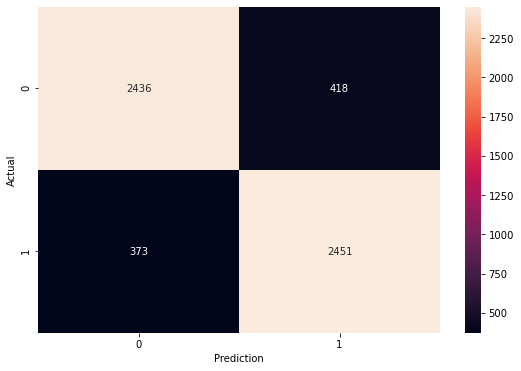

In [112]:
sns.heatmap(confusion_matrix(y_val_smoted, y_val_pred), annot=True, fmt='.0f')
plt.xlabel('Prediction')
plt.ylabel('Actual');

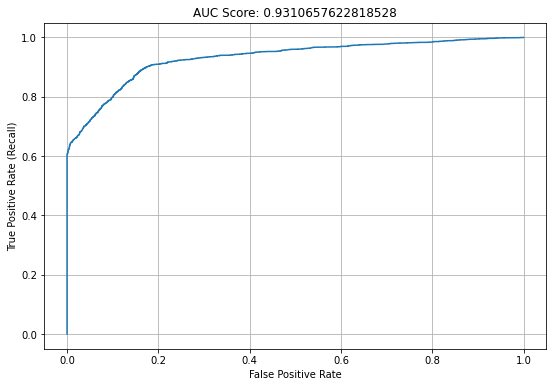

In [113]:
# plot ROC Curve and compute AUC Score
fpr, tpr, thresholds = roc_curve(y_val_smoted, y_val_pred_proba)
plt.figure(figsize=(9,6))
plt.plot(fpr, tpr)
plt.title(f'AUC Score: {roc_auc_score(y_val_smoted, y_val_pred_proba)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid('on')

In [114]:
# Log-loss measure
print('Log Loss: ', log_loss(y_val_smoted, y_val_pred_proba))

Log Loss:  0.32697643823337447


In [115]:
# see the performance on original traning data
y_train_original_pred = lgbm_final.predict(Xtrain)
print(classification_report(ytrain, y_train_original_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     14381
           1       0.60      0.64      0.62      4777

    accuracy                           0.80     19158
   macro avg       0.74      0.75      0.74     19158
weighted avg       0.81      0.80      0.81     19158



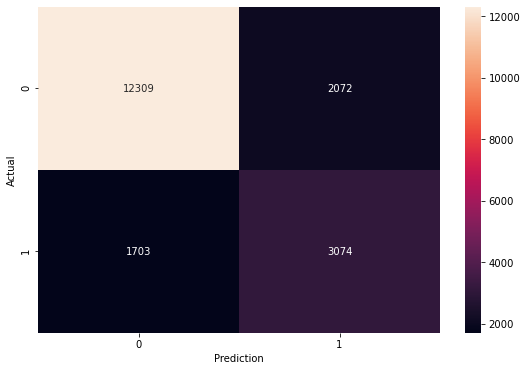

In [116]:
sns.heatmap(confusion_matrix(ytrain, y_train_original_pred), annot=True, fmt='.0f')
plt.xlabel('Prediction')
plt.ylabel('Actual');

### Random Forest

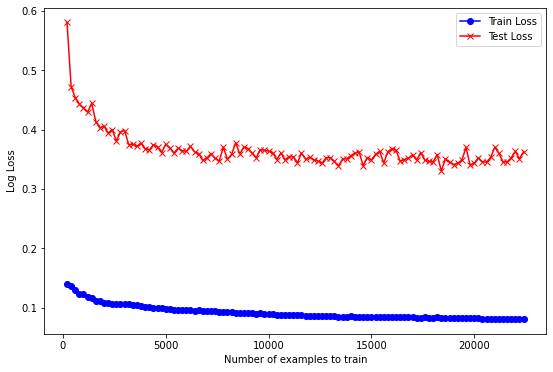

In [134]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
plot_learning_curve(forest_clf, pd.DataFrame(Xtrain_smoted, dtype=float), ytrain_smoted)

It looks like `RandomForest` is overfitting the data.

In [137]:
# MODEL TUNING
forest_params = {
    'n_estimators': [500,1000, 2000],
    'max_depth': [5,8],
    'max_features': [0.5, 'sqrt'],
    'max_samples': [0.5, 0.7, None],
    'min_sample_leaf': [5, 10, 15]
}

forest_cv = GridSearchCV (forest_clf, forest_params, cv=5, n_jobs=-1, verbose=2).fit (Xtrain_smoted, ytrain_smoted)

forest_cv.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'max_depth': 8, 'max_features': 0.5, 'max_samples': None, 'n_estimators': 500}

In [138]:
result_forest = forest_cv.cv_results_
sorted_score = sorted(list(zip(result_forest['params'], result_forest['mean_test_score'])), key=lambda x: x[1])
for params, scores in sorted_score:
    print('Params:', params, 'Score:', scores)

Params: {'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.5, 'n_estimators': 500} Score: 0.8092889929548217
Params: {'max_depth': 5, 'max_features': 'sqrt', 'max_samples': None, 'n_estimators': 500} Score: 0.8093246817258487
Params: {'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.7, 'n_estimators': 500} Score: 0.8096811625091018
Params: {'max_depth': 5, 'max_features': 'sqrt', 'max_samples': None, 'n_estimators': 1000} Score: 0.8101091479991016
Params: {'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.5, 'n_estimators': 1000} Score: 0.8102517822767515
Params: {'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.7, 'n_estimators': 1000} Score: 0.8108936142723546
Params: {'max_depth': 5, 'max_features': 0.5, 'max_samples': None, 'n_estimators': 500} Score: 0.8132474073026614
Params: {'max_depth': 5, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 1000} Score: 0.8135682565389992
Params: {'max_depth': 5, 'max_features': 0.5, 'max_samples': 0.5, 'n_es

In [139]:
forest_cv.best_score_

0.836856924969525

In [119]:
# forest_final = forest_cv.best_estimator_
forest_final = RandomForestClassifier(max_depth=None, max_features='sqrt', max_samples=None, 
                                      n_estimators=1000, min_samples_leaf=5, n_jobs=-1)

X_train_split_smoted, X_val_smoted, y_train_split_smoted, y_val_smoted \
            = train_test_split(Xtrain_smoted, ytrain_smoted, test_size=0.2)

forest_final.fit(X_train_split_smoted, y_train_split_smoted)
y_val_pred = forest_final.predict(X_val_smoted)
y_val_pred_proba = forest_final.predict_proba(X_val_smoted)[:,1]

In [120]:
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, classification_report, confusion_matrix

print(classification_report(y_val_smoted, y_val_pred))
print('AUC Score:', roc_auc_score(y_val_smoted, y_val_pred_proba))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2873
           1       0.87      0.88      0.87      2805

    accuracy                           0.87      5678
   macro avg       0.87      0.87      0.87      5678
weighted avg       0.87      0.87      0.87      5678

AUC Score: 0.9398535011257928


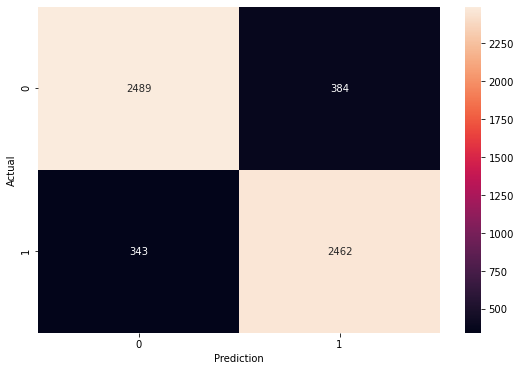

In [121]:
sns.heatmap(confusion_matrix(y_val_smoted, y_val_pred), annot=True, fmt='.0f')
plt.xlabel('Prediction')
plt.ylabel('Actual');

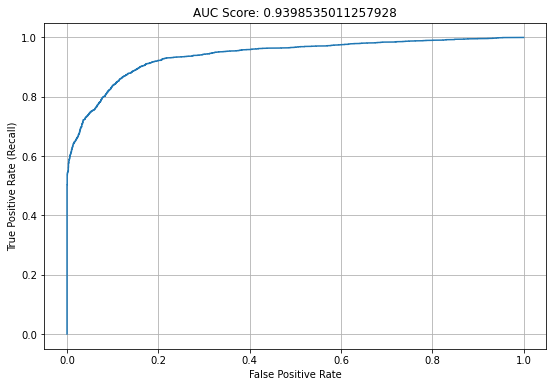

In [122]:
fpr, tpr, thresholds = roc_curve(y_val_smoted, y_val_pred_proba)
plt.figure(figsize=(9,6))
plt.plot(fpr, tpr)
plt.title(f'AUC Score: {roc_auc_score(y_val_smoted, y_val_pred_proba)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid('on')

In [123]:
# log Loss
print('Log Loss:', log_loss(y_val_smoted, y_val_pred_proba))

Log Loss: 0.3177404680016898


In [237]:
# see the performance on original training data
y_train_original_pred = forest_final.predict(Xtrain)
print(classification_report(ytrain, y_train_original_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     14381
           1       0.67      0.68      0.68      4777

    accuracy                           0.84     19158
   macro avg       0.78      0.79      0.78     19158
weighted avg       0.84      0.84      0.84     19158



### ExtraTreeClassifier

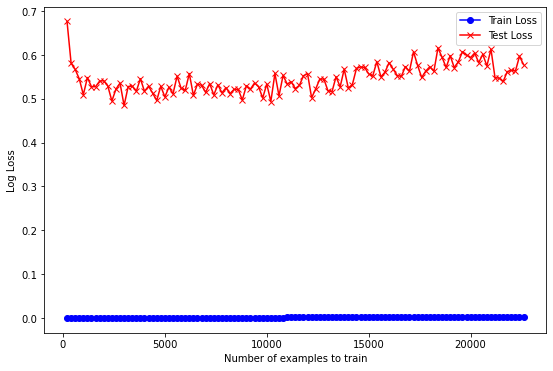

In [128]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)
plot_learning_curve(extra_tree_clf, pd.DataFrame(Xtrain_smoted, dtype=float), ytrain_smoted)

In [ ]:
# model tuning


In [126]:
extra_tree_final = ExtraTreesClassifier(n_estimators=1000, min_samples_split=10, n_jobs=-1,
                                       min_samples_leaf=4, bootstrap=True, max_features='sqrt',
                                       random_state=42)

X_train_split_smoted, X_val_smoted, y_train_split_smoted, y_val_smoted \
            = train_test_split(Xtrain_smoted, ytrain_smoted, test_size=0.2)

extra_tree_final.fit(X_train_split_smoted, y_train_split_smoted)
y_val_pred = extra_tree_final.predict(X_val_smoted)
y_val_pred_proba = extra_tree_final.predict_proba(X_val_smoted)[:,1]

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2854
           1       0.84      0.86      0.85      2824

    accuracy                           0.85      5678
   macro avg       0.85      0.85      0.85      5678
weighted avg       0.85      0.85      0.85      5678

AUC Score: 0.9240288343381685


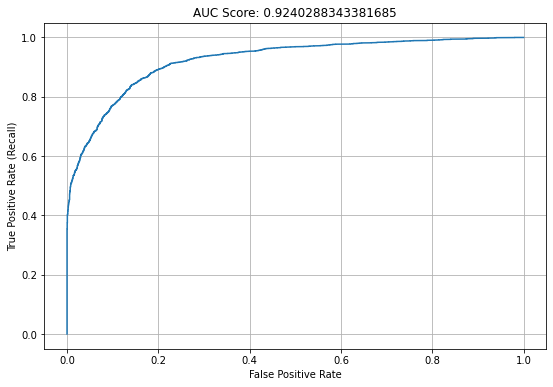

In [127]:
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, classification_report, confusion_matrix

print(classification_report(y_val_smoted, y_val_pred))
print('AUC Score:', roc_auc_score(y_val_smoted, y_val_pred_proba))

# plot ROC Curve and compute AUC Score
fpr, tpr, thresholds = roc_curve(y_val_smoted, y_val_pred_proba)
plt.figure(figsize=(9,6))
plt.plot(fpr, tpr)
plt.title(f'AUC Score: {roc_auc_score(y_val_smoted, y_val_pred_proba)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid('on')

In [128]:
# Log-loss measure
print('Log Loss: ', log_loss(y_val_smoted, y_val_pred_proba))

# see the performance on original traning data
y_train_original_pred = lgbm_final.predict(Xtrain)
print(classification_report(ytrain, y_train_original_pred))

Log Loss:  0.3797394722141614
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     14381
           1       0.60      0.64      0.62      4777

    accuracy                           0.80     19158
   macro avg       0.74      0.75      0.74     19158
weighted avg       0.81      0.80      0.81     19158



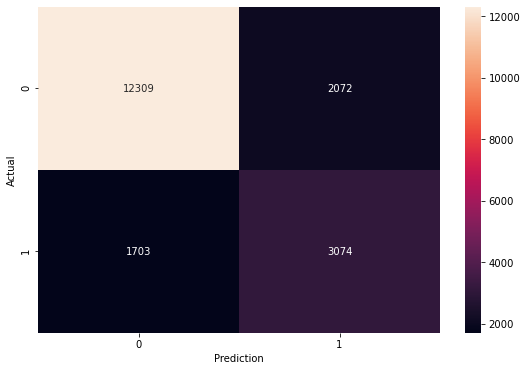

In [130]:
sns.heatmap(confusion_matrix(ytrain, y_train_original_pred), annot=True, fmt='.0f')
plt.xlabel('Prediction')
plt.ylabel('Actual');

# Evaluate Model On Test Data

## Evaluate Models

All three models are providing comparable results, so I'll test both of them.

<AxesSubplot:>

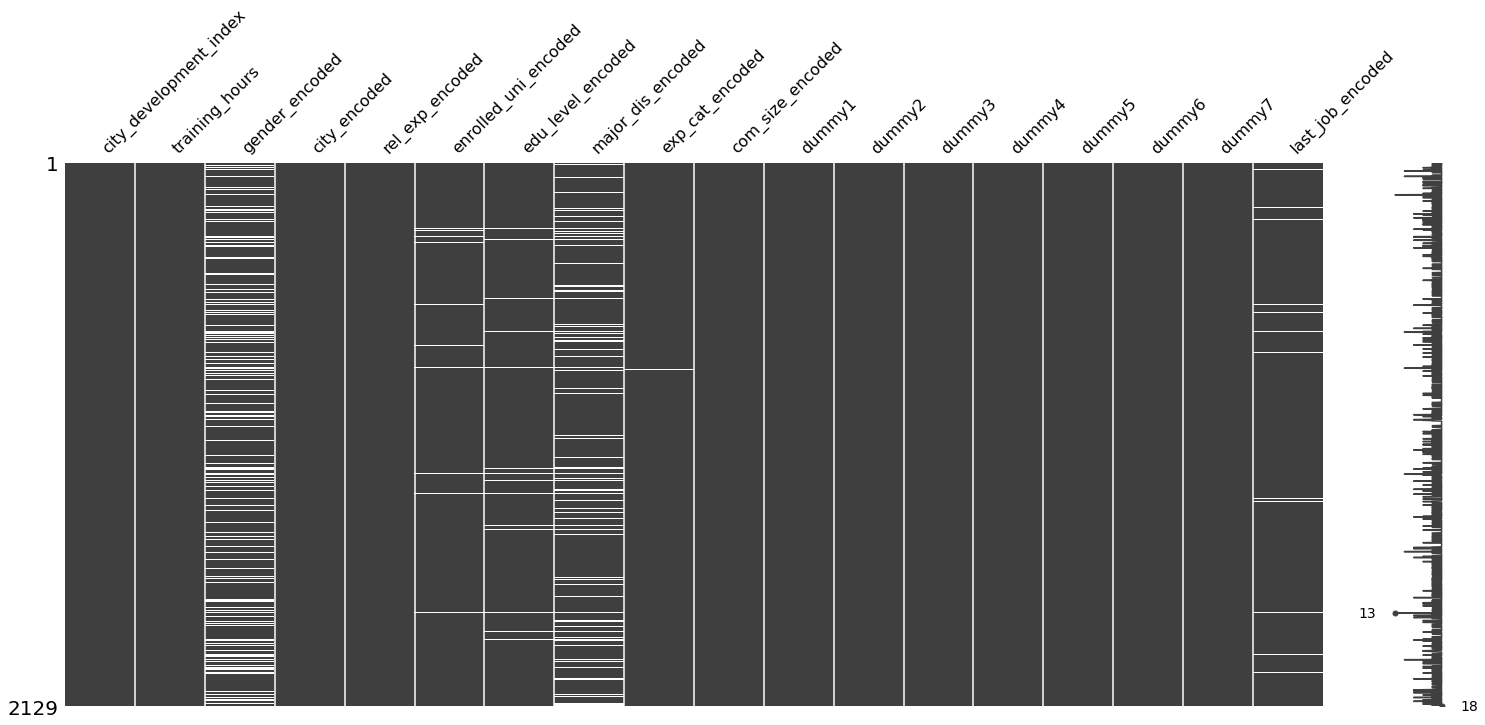

In [131]:
msno.matrix(test_encoded)

In [132]:
Xtest = fillna_pipeline.transform(test_encoded)

<AxesSubplot:>

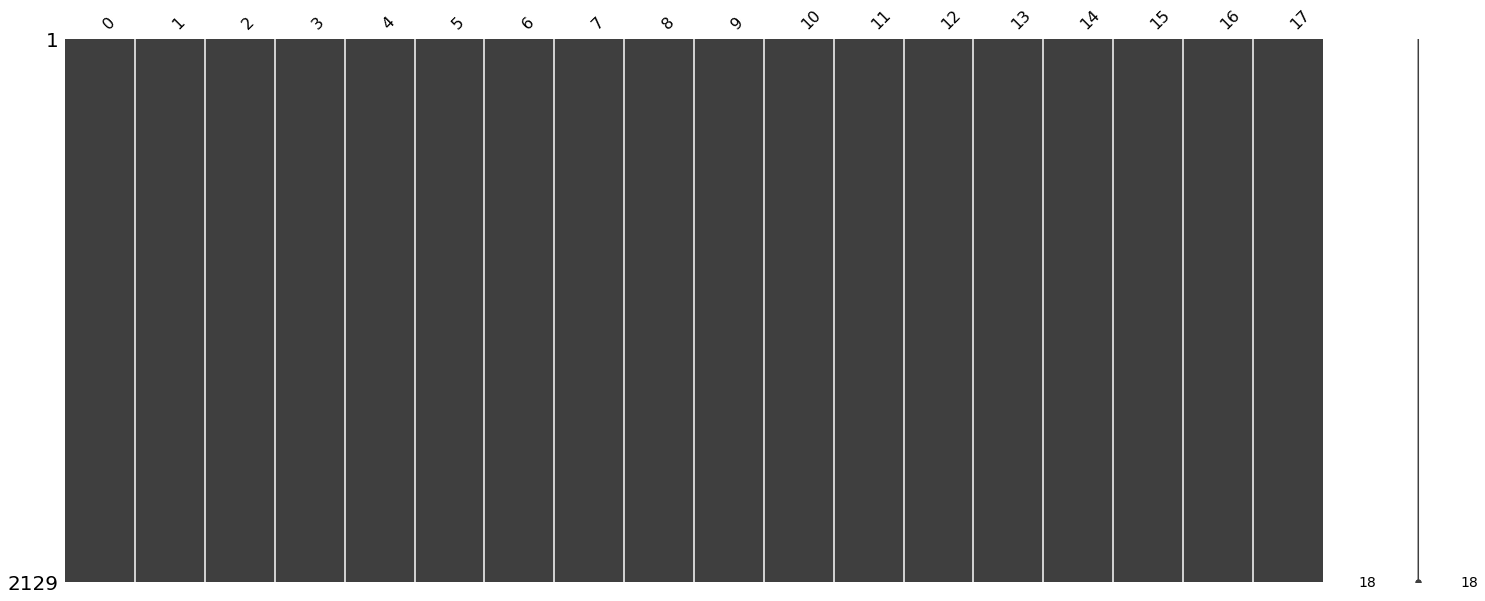

In [133]:
msno.matrix(pd.DataFrame(Xtest))

In [134]:
# test lgbm model
y_test_pred_lgbm = lgbm_final.predict(Xtest)
y_test_pred_proba_lgbm = lgbm_final.predict_proba(Xtest)[:,1]

# test random forest model
y_test_pred_forest = forest_final.predict(Xtest)
y_test_pred_proba_forest = forest_final.predict_proba(Xtest)[:,1]

# test extra tree model
y_test_pred_extra = extra_tree_final.predict(Xtest)
y_test_pred_proba_extra = extra_tree_final.predict_proba(Xtest)[:,1]

In [135]:
path_answer = 'C:/Users/Fiores/Desktop/ML Resources/My Projects/datasets/kaggle/HR Analytics/answer.npy'
answer = np.load(path_answer)
answer

array([1., 0., 1., ..., 0., 0., 0.])

In [136]:
print('Classification Report For LGBM')
print(classification_report(answer, y_test_pred_lgbm))
print()

print('Classification Report For Random Forest')
print(classification_report(answer, y_test_pred_forest))
print()

print('Classification Report For ExtraTree')
print(classification_report(answer, y_test_pred_extra))
print()

Classification Report For LGBM
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1553
         1.0       0.60      0.61      0.61       576

    accuracy                           0.79      2129
   macro avg       0.73      0.73      0.73      2129
weighted avg       0.79      0.79      0.79      2129


Classification Report For Random Forest
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      1553
         1.0       0.61      0.60      0.60       576

    accuracy                           0.79      2129
   macro avg       0.73      0.73      0.73      2129
weighted avg       0.79      0.79      0.79      2129


Classification Report For ExtraTree
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1553
         1.0       0.59      0.66      0.62       576

    accuracy                           0.78      2129
   macro avg       

In [244]:
print('AUC Score For LGBM', roc_auc_score(answer, y_test_pred_proba_lgbm))
print('AUC Score For Random Forest', roc_auc_score(answer, y_test_pred_proba_forest))
print('AUC Score For Extra Tree', roc_auc_score(answer, y_test_pred_proba_extra))

AUC Score For LGBM 0.7966514184016599
AUC Score For Random Forest 0.7927029673749733
AUC Score For Extra Tree 0.7896622576375474


## Feature Importance

### LGBM

<AxesSubplot:title={'center':'Feature Importance In Splitting'}, xlabel='Feature importance', ylabel='Features'>

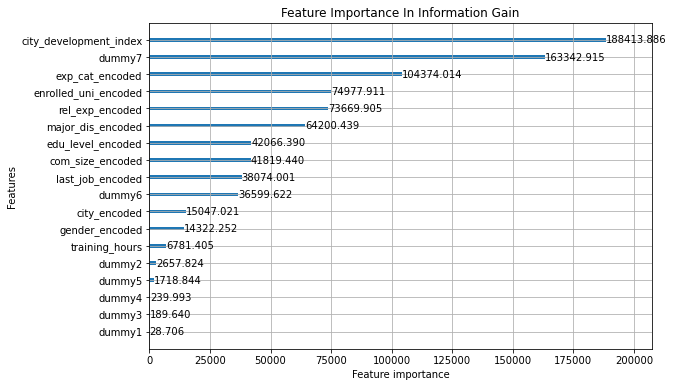

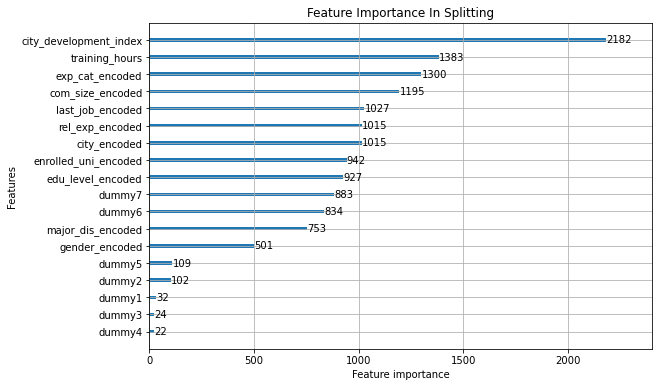

In [212]:
# see feature importance of lgbm
import lightgbm as lgb

lgb.plot_importance(lgbm_final, importance_type='gain', 
                    title='Feature Importance In Information Gain')
lgb.plot_importance(lgbm_final, importance_type='split', 
                    title='Feature Importance In Splitting')

It's weird that `training_hours` was used a lot to split nodes, but only contributed quite little to information gain.

### Random Forest

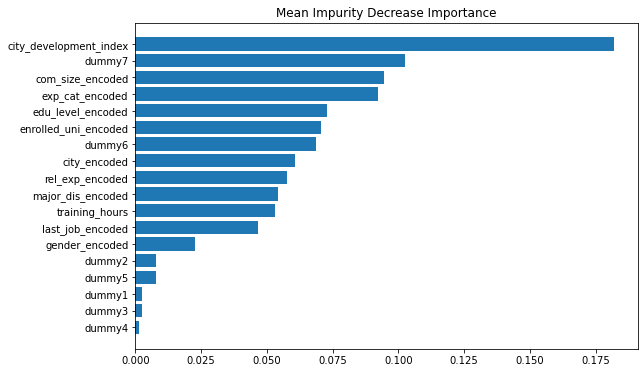

In [251]:
# mean impurity decrease importance
sorted_idx = forest_final.feature_importances_.argsort()
plt.figure()
plt.barh(Xtrain.columns[sorted_idx], forest_final.feature_importances_[sorted_idx])
plt.title('Mean Impurity Decrease Importance');

Text(0.5, 0, 'Permutation Importance On Test Set')

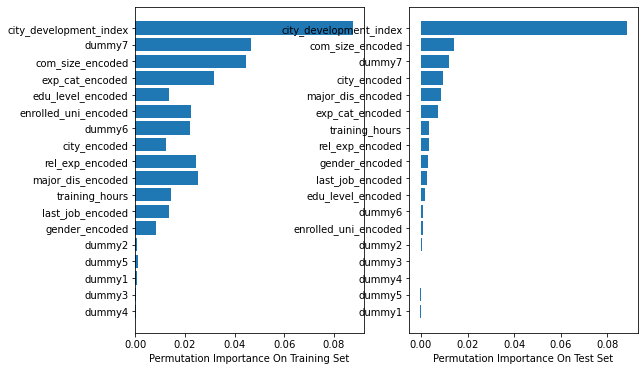

In [252]:
# permutation-based importance
from sklearn.inspection import permutation_importance

# Compute on the training set
perm_importance_train = permutation_importance(forest_final, Xtrain_smoted, ytrain_smoted)
sorted_idx_train = perm_importance_train.importances_mean.argsort()
plt.subplot(121)
plt.barh(Xtrain.columns[sorted_idx], perm_importance_train.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance On Training Set")

# Compute on the test set
perm_importance_test = permutation_importance(forest_final, Xtest, answer)
sorted_idx = perm_importance_test.importances_mean.argsort()
plt.subplot(122)
plt.barh(Xtrain.columns[sorted_idx], perm_importance_test.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance On Test Set")

The importance of `enrolled_university` and `dummy6` drops significantly from the training to the test set, which might indicate that `Random Forest` has the capability of using those 2 features to overfit the training set.

### Extra Tree

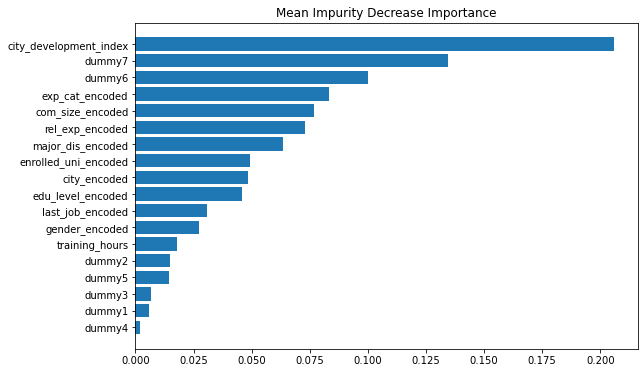

In [253]:
# feature importance of extra tree

# mean impurity decrease importance
sorted_idx = extra_tree_final.feature_importances_.argsort()
plt.figure()
plt.barh(Xtrain.columns[sorted_idx], extra_tree_final.feature_importances_[sorted_idx])
plt.title('Mean Impurity Decrease Importance');

Text(0.5, 0, 'Permutation Importance')

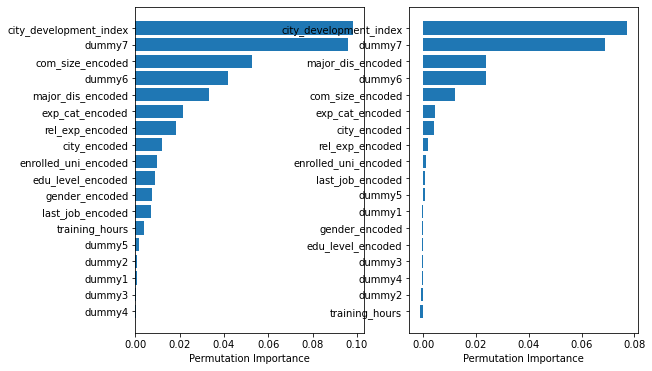

In [254]:
# permutation-based importance
from sklearn.inspection import permutation_importance

# Compute on the training set
perm_importance_train = permutation_importance(extra_tree_final, Xtrain_smoted, ytrain_smoted)
sorted_idx = perm_importance_train.importances_mean.argsort()
plt.figure()
plt.subplot(121)
plt.barh(Xtrain.columns[sorted_idx], perm_importance_train.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance On Training Set")

# Compute on the test set
perm_importance_test = permutation_importance(extra_tree_final, Xtest, answer)
sorted_idx = perm_importance_test.importances_mean.argsort()
plt.subplot(122)
plt.barh(Xtrain.columns[sorted_idx], perm_importance_test.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance On Test Set")

From the feature importance bar charts for 3 models, we might have some inference:

* `city_development_index` actually plays a vital role in the performance of all 3 models
* `dummies` attributes from 1 to 5 doesn't help much. `dummy 7` is quite relevant.
* Features that are usually of high importance: `cdi`, `dummy7`, `company_size`, `major_discipline`, `experience`.
* Feature that are less important: `dummy from 1 to 5`.

# Summary

* `LGBM` will be our final model. Because  of its consistency, from the learning curve, classification report,  to the AUC Score.

* We can drop 5 `dummies` features from `1` to `5` and see if the model is performing any better.

* Based on the demand of the company, whether they only want to spend time with candidates who really want to get the job, or they don't want to miss any potential employees, we can adjust the `thresold` of our model to adjust `precision` and `recall` appropriately

* Many thanks to Ozan GÜNER and his submission on Kaggle that provide the foundation for my work. [Here](https://www.kaggle.com/oktayozangner/hr-analytics-for-data-scientists-using-lgbm) is the link to his analysis.